# Capstone Project: Car Accident Severity
### Applied Data Science Course by Waleed Muhammad 

## The goal of this project is to help interested organizations/companies predict road accidents in Seatlle, U.S. This will help lower the number of car related accidents in Seatlle and across the nation. 

## Introduction: Business Problem

Say you are driving to another city for work or to visit some friends. It is rainy and windy, and on the way, you come across a terrible traffic jam on the other side of the highway. Long lines of cars barely moving. As you keep driving, police car start appearing from afar shutting down the highway. Oh, it is an accident and there's a helicopter transporting the ones involved in the crash to the nearest hospital. They must be in critical condition for all of this to be happening. Now, wouldn't it be great if there is something in place that could warn you, given the weather and the road conditions about the possibility of you getting into a car accident and how severe it would be, so that you would drive more carefully or even change your travel if you are able to. That is what this project will help uncover and solve. I aim to find correlations in several variables which can lead to a car accident and how severe it is. This information can be used for accident prevention organizations, local governments, etc. 

## Data Understanding

1. Import libraries
2. Load the data set

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
!pip install imblearn

     |████████████████████████████████| 174kB 6.0MB/s eta 0:00:01
     |████████████████████████████████| 6.8MB 4.8MB/s eta 0:00:01     |███████████████████████         | 4.9MB 4.8MB/s eta 0:00:01   | 6.2MB 4.8MB/s eta 0:00:01
     |████████████████████████████████| 307kB 39.8MB/s eta 0:00:01
  Found existing installation: scikit-learn 0.20.1
    Uninstalling scikit-learn-0.20.1:
      Successfully uninstalled scikit-learn-0.20.1


In [5]:
!pip install statsmodels

     |████████████████████████████████| 9.5MB 5.8MB/s eta 0:00:01    | 2.8MB 5.8MB/s eta 0:00:02�██▍            | 5.7MB 5.8MB/s eta 0:00:01
     |████████████████████████████████| 235kB 34.4MB/s eta 0:00:01


In [6]:
!pip install yellowbrick

     |████████████████████████████████| 276kB 9.3MB/s eta 0:00:01


In [7]:
!pip install missingno

In [8]:
from datetime import datetime
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.cluster import KMeans
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.feature_selection import chi2
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.seasonal import seasonal_decompose
from yellowbrick.cluster import KElbowVisualizer
import matplotlib.pyplot as plt
import missingno as msno
import numpy as np
import pandas as pd
import seaborn as sns

%config InlineBackend.figure_format = 'retina'

In [9]:

URL = 'Data.csv'

In [10]:
date_parser = lambda x: datetime.strptime(x, '%Y/%m/%d %H:%M:%S+%f')


In [11]:
raw_data = pd.read_csv(URL, parse_dates=['INCDATE'], date_parser=date_parser)


In [12]:
raw_columns = {
    'X': 'lat',
    'Y': 'lon',
    'SEVERITYCODE': 'severity_code',
    'ADDRTYPE': 'addr_type',
    'COLLISIONTYPE': 'collision_type',
    'PEDCOUNT': 'ped_count',
    'PEDCYLCOUNT': 'cycle_count',
    'INCDTTM': 'inc_datetime',
    'INCDATE': 'inc_date',
    'INATTENTIONIND': 'inattention_ind',
    'UNDERINFL': 'under_infl',
    'WEATHER': 'weather',
    'ROADCOND': 'road_cond',
    'LIGHTCOND': 'light_cond',
    'PEDROWNOTGRNT': 'ped_row_not_grnt',
    'SPEEDING': 'speeding',
    'HITPARKEDCAR': 'hit_parked_car'
}

df = raw_data[list(raw_columns.keys())].rename(columns=raw_columns).copy()
df.loc[:, 'inc_datetime'] = pd.to_datetime(df['inc_datetime'])

In [13]:
df.head()

,lat,lon,severity_code,addr_type,collision_type,ped_count,cycle_count,inc_datetime,inc_date,inattention_ind,under_infl,weather,road_cond,light_cond,ped_row_not_grnt,speeding,hit_parked_car
0,-122.323148,47.703140,2,Intersection,Angles,0,0,2013-03-27 14:54:00,2013-03-27,NaN,N,Overcast,Wet,Daylight,NaN,NaN,N
1,-122.347294,47.647172,1,Block,Sideswipe,0,0,2006-12-20 18:55:00,2006-12-20,NaN,0,Raining,Wet,Dark - Street Lights On,NaN,NaN,N
2,-122.334540,47.607871,1,Block,Parked Car,0,0,2004-11-18 10:20:00,2004-11-18,NaN,0,Overcast,Dry,Daylight,NaN,NaN,N
3,-122.334803,47.604803,1,Block,Other,0,0,2013-03-29 09:26:00,2013-03-29,NaN,N,Clear,Dry,Daylight,NaN,NaN,N
4,-122.306426,47.545739,2,Intersection,Angles,0,0,2004-01-28 08:04:00,2004-01-28,NaN,0,Raining,Wet,Daylight,NaN,NaN,N


#### Target Variable
It would be good to first look at the distribution of the target variable in the data set. Because if we have an imbalanced dataset, may need to do extra processes. It is also helpful to remember what these values in the SEVERITYCODE field mean,

1: Property damage

2: Injury

In [14]:

def set_title(number, name):
    return r'$\bf{Figure' + str(number) + '.}$ ' + name

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


FileNotFoundError: [Errno 2] No such file or directory: 'images/figure1.png'

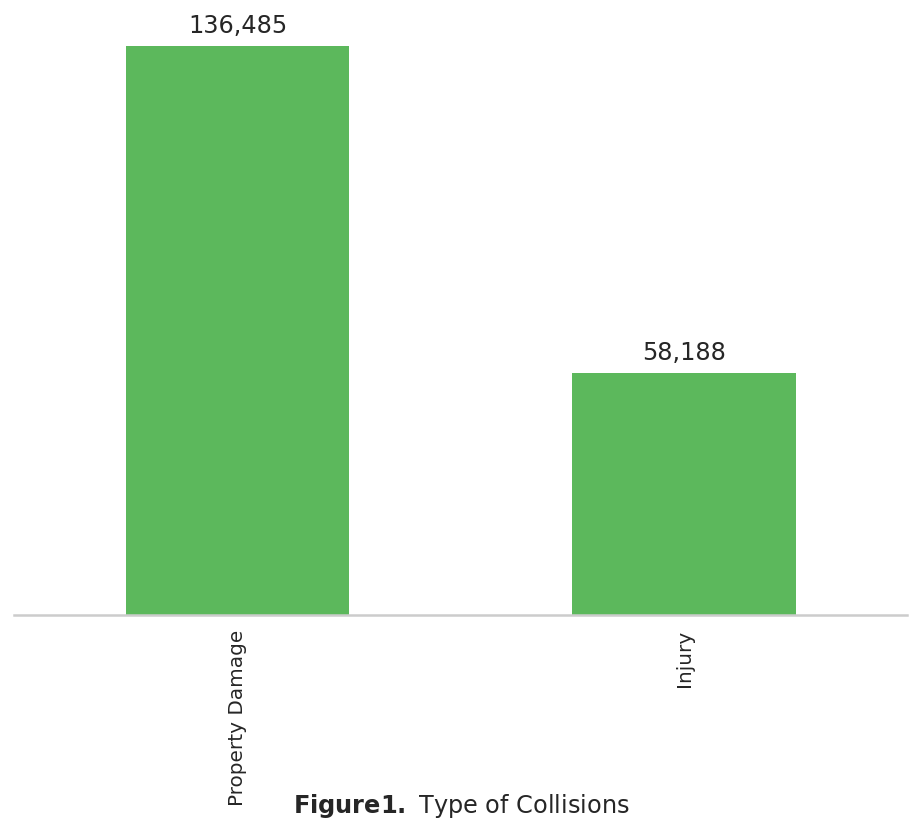

In [15]:
vc = df['severity_code'].value_counts()
vc.index = ['Property Damage', 'Injury']
ax = vc.plot.bar(color='#5cb85c')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.axes.get_yaxis().set_visible(False)

ax.grid(False)
ax.set_title(set_title(1, 'Type of Collisions'), y=-0.35)

for p in ax.patches:
    ax.annotate(
        f'{p.get_height():,}',
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha='center', 
        va='center', 
        xytext=(0, 10), 
        textcoords='offset points',
        fontsize=12
    )

ax.figure.savefig('images/figure1.png', dpi=300, bbox_inches='tight')

As you can see in the diagram, accidents that result in property damage are much more significant than those that result in injury.

## **Methodology**

We will predict the severity of an accident based on many variables. 

First, we will look at the independant variables with the help of visualization libraries such as **matplotlib** and **seaborn**. To test their dependence on our target variable, we will use chi_square test for binary variables. We'll use **K-Means** to clustering coordinates.

Next, we'll try **binary classification** algorithms such as **logistic regression** to predict severity of collisions. We may need **oversampling** or **undersampling** methods to balance the dataset. So, we can create a pipeline with undersampling or oversampling, then tune the **hyperparameters**.

Finally, we will **evaluate** the model we have prepared with classification metrics such as **precision**, **recall**, **f1-score etc**. and examine feature importance. And we will complete our preparations for other sections where we will talk and discuss the results.

## **Analysis**

**Weather Condition**

Let's look at observations with various weather conditions by severity of crashes. That may be insight about crashes and also weather condition may be important variable to our model after.

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


FileNotFoundError: [Errno 2] No such file or directory: 'images/figure2.png'

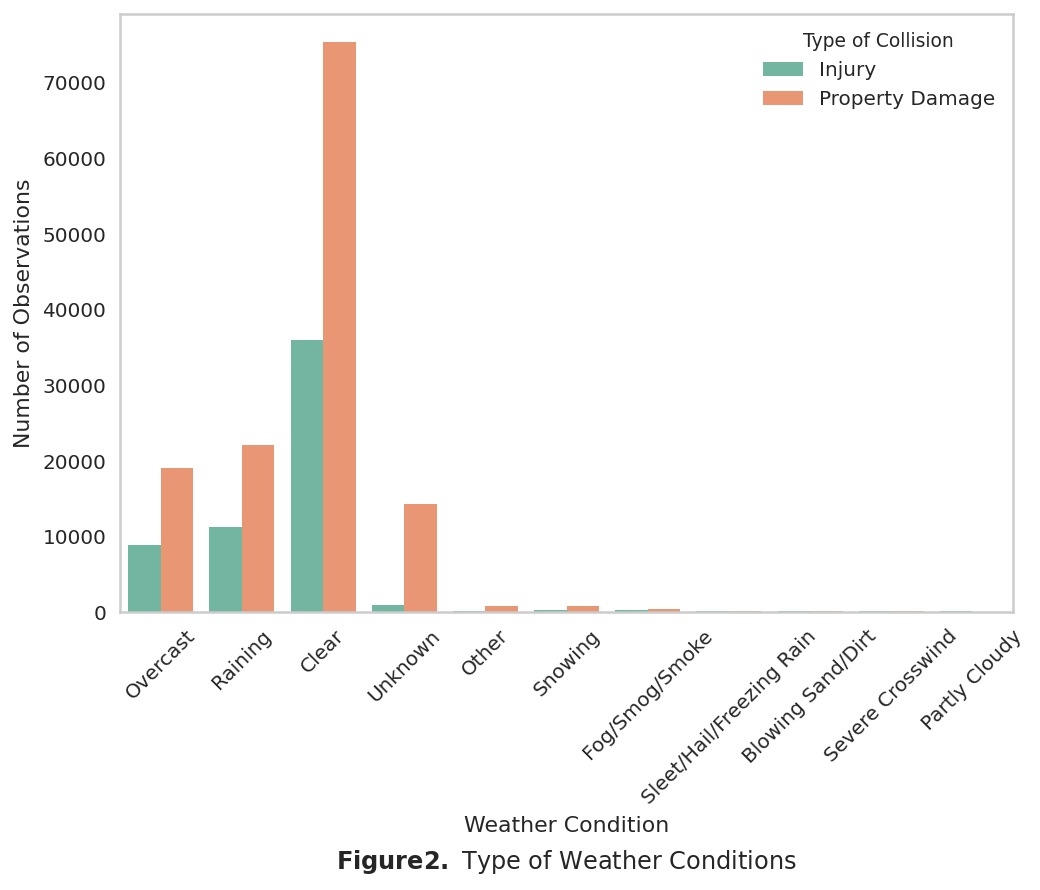

In [16]:
renamed = df[['weather', 'severity_code']].copy()
codes = {1: 'Property Damage', 2: 'Injury'}
renamed['Type of Collision'] = renamed['severity_code'].replace(codes)

ax = sns.countplot(
    data=renamed,
    x='weather',
    hue='Type of Collision',
    palette='Set2'
)

ax.set_xticklabels(
    ax.get_xticklabels(), 
    rotation=45
)

ax.grid(False)
ax.set_title(set_title(2, 'Type of Weather Conditions'), y=-0.45)
ax.set_xlabel('Weather Condition')
ax.set_ylabel('Number of Observations')

ax.figure.savefig('images/figure2.png', dpi=300, bbox_inches='tight')

As seen in the graph, most accidents happen on clear weather. 

In [17]:
weather_df = df[['inc_date', 'weather', 'severity_code']].copy()
weather_df.loc[:, 'month'] = weather_df['inc_date'].dt.month

FileNotFoundError: [Errno 2] No such file or directory: 'images/figure3.png'

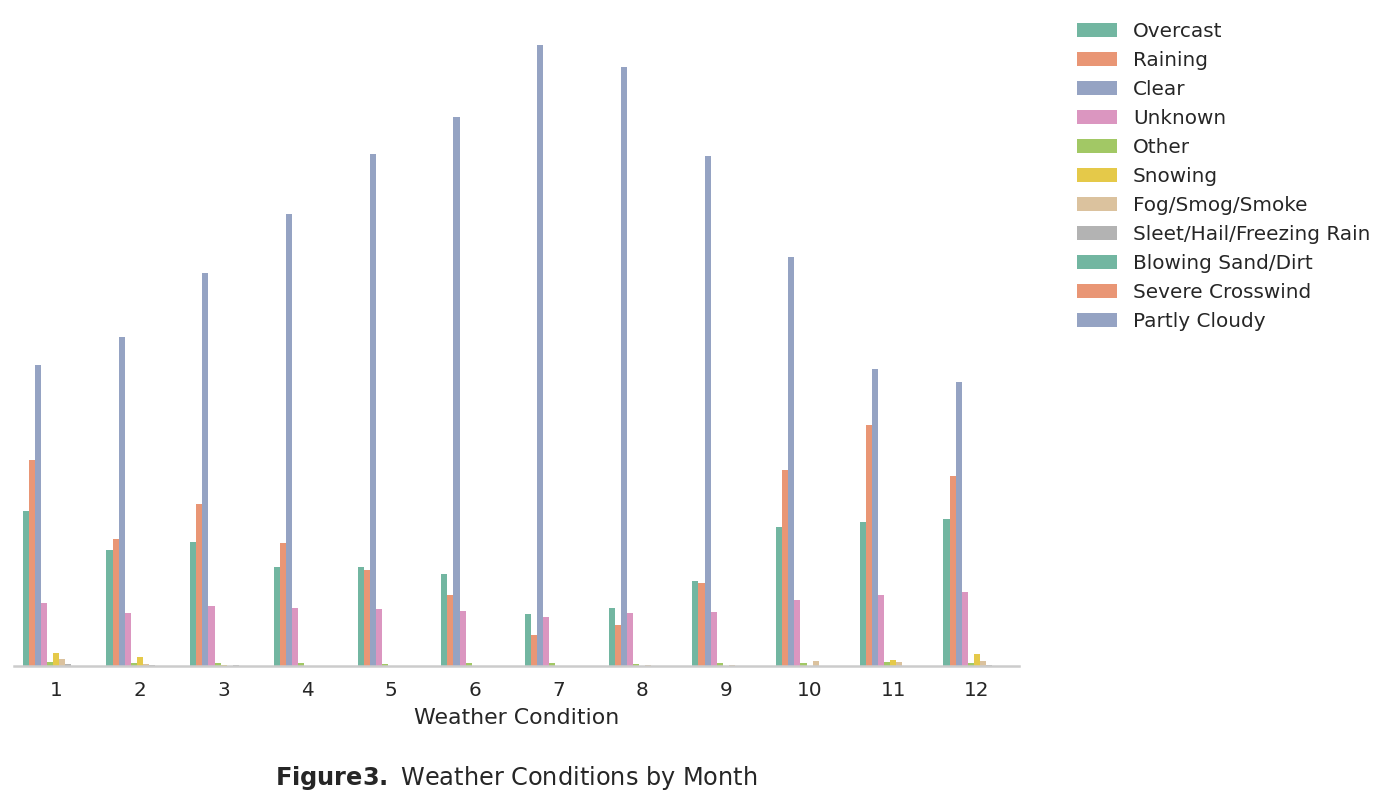

In [18]:
ax = sns.countplot(
    data=weather_df,
    x='month',
    hue='weather',
    palette='Set2'
)

ax.figure.set_figwidth(9)
ax.figure.set_figheight(6)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.axes.get_yaxis().set_visible(False)

ax.set_title(set_title(3, 'Weather Conditions by Month'), y=-0.2)
ax.set_xlabel('Weather Condition')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

ax.figure.savefig('images/figure3.png', dpi=300, bbox_inches='tight')

It looks like there are months when there is more rainy days, however most accidents occurs in other months, especially June, July and August. When we look at the summer months for Seattle, we can see that these months receive less rainfall and are warmer than other months. So, that situation supports our hypothesis: "People may be more likely to go outdoors in clear weather."

**Road Conditions**

Let us look at the relationship betweem road conditions and accident severity.

FileNotFoundError: [Errno 2] No such file or directory: 'images/figure4.png'

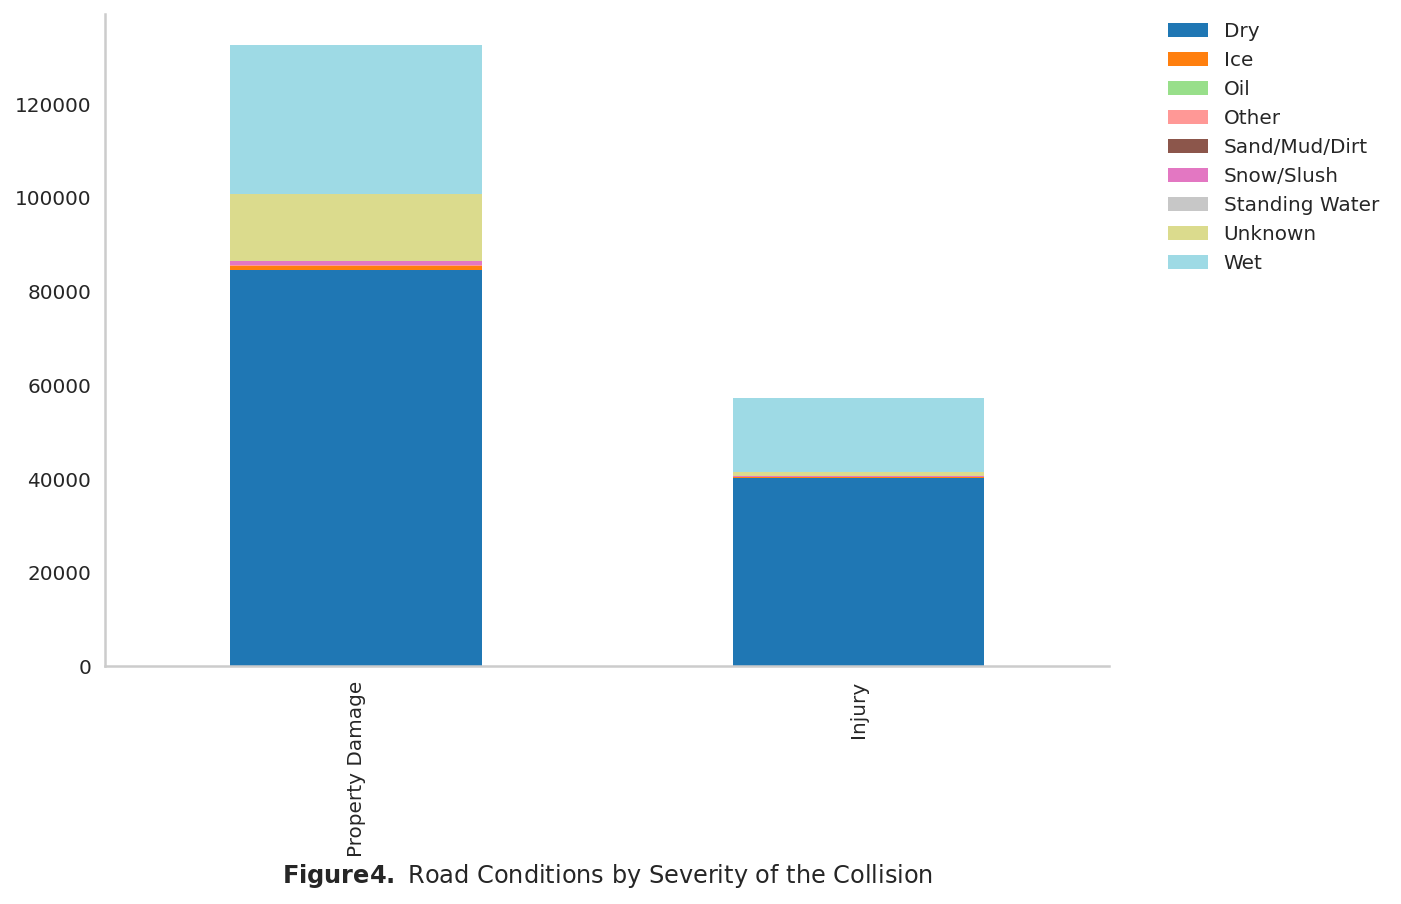

In [19]:
stacked = df \
    .groupby(['road_cond', 'severity_code']) \
    .size() \
    .reset_index() \
    .pivot(columns='road_cond', index='severity_code', values=0)

stacked.index = ['Property Damage', 'Injury']

ax = stacked.plot(
    kind='bar', 
    stacked=True, 
    figsize=(9, 6),
    colormap='tab20'
)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(False)

ax.set_title(set_title(4, 'Road Conditions by Severity of the Collision'), y=-0.35)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

ax.figure.savefig('images/figure4.png', dpi=300, bbox_inches='tight')

Looking at this chart, we can see that **dry** road conditions have that highest relationship to Property damage and injury related accidents. Although, Wet conditions come second to that in significance. 

**Light Condition**

Let's takae a look at how light conditions correlate to accidents. First, we will process the data to make it more understandable. Additioanlly, we can map No Streets Lights and Street Lights Off to Dark.

In [20]:
mapping = {
    'Dark - No Street Lights': 'Dark',
    'Dark - Street Lights Off': 'Dark',
    'Dark - Street Lights On': 'Street Lights'
}

def find_observations(data, severity_code):
    columns = ['light_cond', 'severity_code']
    filtered = df[df[columns[1]] == severity_code][columns].copy()
    
    filtered['light_cond'] = filtered['light_cond'].replace(mapping)
    removal = ['Other', 'Unknown', 'Dark - Unknown Lighting']
    filtered = filtered[~filtered['light_cond'].isin(removal)]
    
    return filtered \
        .groupby('light_cond') \
        .size() \
        .rename('num_of_observations') \
        .reset_index()

In [21]:
severity1 = find_observations(df, severity_code=1)
severity2 = find_observations(df, severity_code=2)

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


FileNotFoundError: [Errno 2] No such file or directory: 'images/figure5.png'

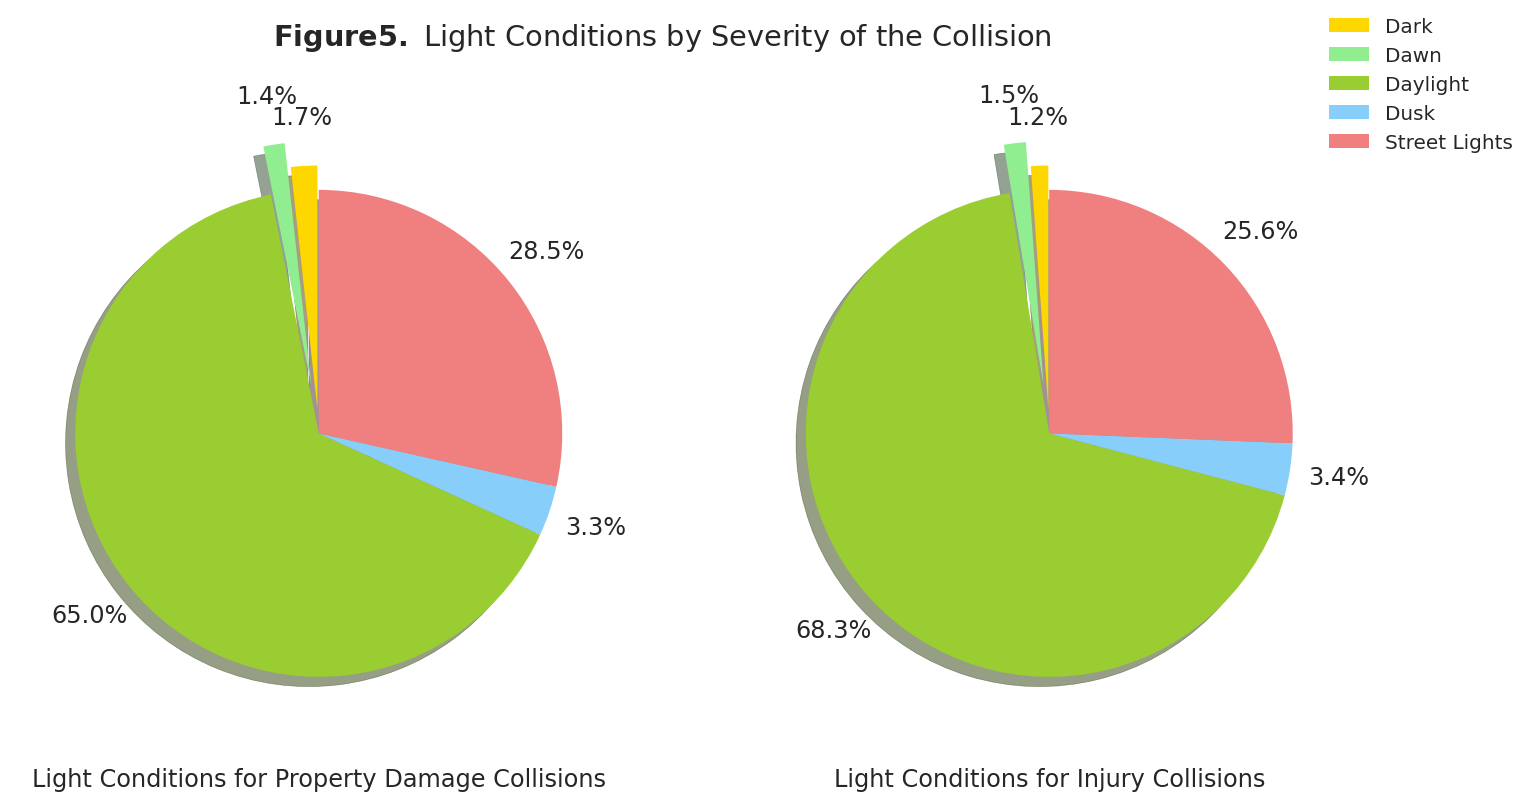

In [22]:
colors_list = [
    'gold', 
    'lightgreen', 
    'yellowgreen', 
    'lightskyblue', 
    'lightcoral'
]
explodes = [0.1, 0.2, 0, 0, 0]

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figwidth(12)
fig.set_figheight(6)


sizes1 = severity1['num_of_observations'].tolist()
ax1.pie(
    sizes1, 
    labels=None,
    explode=explodes,
    colors=colors_list,
    pctdistance=1.2,
    autopct='%1.1f%%',
    shadow=True,
    startangle=90
)
ax1.set_title('Light Conditions for Property Damage Collisions', y=-0.1)

sizes2 = severity2['num_of_observations'].tolist()
ax2.pie(
    sizes2, 
    labels=None,
    explode=explodes,
    colors=colors_list,
    pctdistance=1.2,
    autopct='%1.1f%%',
    shadow=True,
    startangle=90
)
ax2.set_title('Light Conditions for Injury Collisions', y=-0.1)
fig.suptitle(set_title(5, 'Light Conditions by Severity of the Collision'))
fig.legend(labels=severity1['light_cond'].tolist())

fig.savefig('images/figure5.png', dpi=300, bbox_inches='tight')

As we can see, most accidents occur in **daylight**. Although, we can see that accidents near street lights are also significant. 

**Binary Varibales**

Now, we will take a look at the binary varibles such as **inattention_ind**, **under_infl**, etc. We will also create binary values from **ped_count** and **cycle_count**.

In [23]:
df.loc[:, 'is_ped'] = np.where(df['ped_count'] > 0, 1, 0)
df.loc[:, 'is_bike'] = np.where(df['cycle_count'] > 0, 1, 0)
df = df.drop(columns=['ped_count', 'cycle_count'])

In [24]:
bin_columns = [
    'inattention_ind',
    'under_infl',
    'ped_row_not_grnt',
    'speeding',
    'hit_parked_car'
]
df[bin_columns].isnull().sum()

inattention_ind     164868
under_infl            4884
ped_row_not_grnt    190006
speeding            185340
hit_parked_car           0
dtype: int64

Because there are so many missing values in **inattention_ind, ped_row_not_grnt**, and **speeding** we will remove these columns. 

In [25]:
df = df.drop(columns=['inattention_ind', 'ped_row_not_grnt', 'speeding'])

In [26]:

df.loc[df['under_infl'] == 'N', 'under_infl'] = 0
df.loc[df['under_infl'] == 'Y', 'under_infl'] = 1

df.loc[df['hit_parked_car'] == 'N', 'hit_parked_car'] = 0
df.loc[df['hit_parked_car'] == 'Y', 'hit_parked_car'] = 1
df['hit_parked_car'] = df['hit_parked_car'].astype(int)

In [27]:
df['under_infl'] = pd.to_numeric(df['under_infl'], errors='coerce')


We also need to fill the missing values in **under_infl** field. This is a binary variable and we can use frequency to fill the missing data in that field. 

In [28]:
counts = df['under_infl'].value_counts(normalize=True)
counts

0.0    0.951941
1.0    0.048059
Name: under_infl, dtype: float64

In [29]:
# fill by frequency
condition = df['under_infl'].isna()
df.loc[condition, 'under_infl'] = np.random.choice(
    counts.index, 
    p=counts.values, 
    size=condition.sum()
)

In [30]:
df['under_infl'].value_counts(normalize=True)


0.0    0.951868
1.0    0.048132
Name: under_infl, dtype: float64

In [31]:
df[['under_infl', 'is_bike', 'is_ped', 'hit_parked_car', 'severity_code']].corr()

,under_infl,is_bike,is_ped,hit_parked_car,severity_code
under_infl,1.000000,-0.017689,0.014370,0.010884,0.042532
is_bike,-0.017689,1.000000,-0.017159,-0.030282,0.214702
is_ped,0.014370,-0.017159,1.000000,-0.036107,0.252198
hit_parked_car,0.010884,-0.030282,-0.036107,1.000000,-0.101498
severity_code,0.042532,0.214702,0.252198,-0.101498,1.000000


In [32]:
cols = [
    'under_infl', 
    'is_bike', 
    'is_ped', 
    'hit_parked_car'
]

chi2_scores, p_values = chi2(
    df[cols],
    df['severity_code']
)

In [33]:
for col, score, p in zip(cols, chi2_scores, p_values):
    print(f'chi2 stats = {score:.2f}\t p value = {p:.2f} \tfor {col}')

chi2 stats = 335.21	 p value = 0.00 	for under_infl
chi2 stats = 8721.07	 p value = 0.00 	for is_bike
chi2 stats = 11940.64	 p value = 0.00 	for is_ped
chi2 stats = 1931.15	 p value = 0.00 	for hit_parked_car


When we look at the chi2 results and the Pearson correlation coefficents, these variables depend on the target variable. In the Pearson correlation, we see a position correlation between **is_bike** and **severity_code**, also the same thing is true for **is_ped** and **severity_code**. Although, we can see that there is not a strong correlation between **hit_parked_car** and **severity_code**

**Address Type ~ Collison Type**

We will take a look at which collison type occurs in which address. For example, **angles** type collsions are liekly to happen in an **intersection**.

FileNotFoundError: [Errno 2] No such file or directory: 'images/figure6.png'

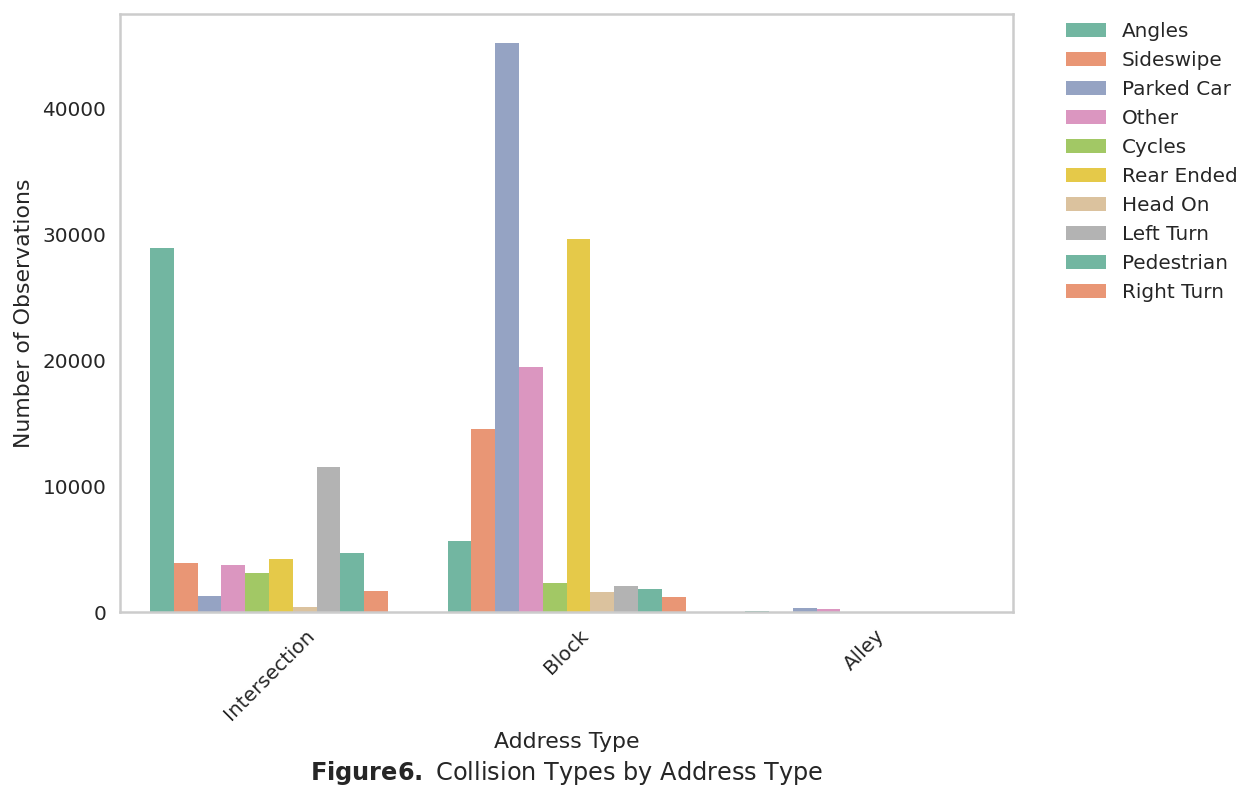

In [34]:
ax = sns.countplot(
    data=df,
    x='addr_type',
    hue='collision_type',
    palette='Set2'
)

ax.set_xticklabels(
    ax.get_xticklabels(), 
    rotation=45
)

ax.grid(False)
ax.set_xlabel('Address Type')
ax.set_ylabel('Number of Observations')

ax.set_title(set_title(6, 'Collision Types by Address Type'), y=-0.3)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

ax.figure.savefig('images/figure6.png', dpi=300, bbox_inches='tight')

As we can see, **angles** related collsions mostly happen at **intersections**. We can also see that **parked car** collisions usually occur within a **block**. **parked car** collsions are also the most common type of collions as well.

We should look into what the severity of **parked car** collsions is. 

FileNotFoundError: [Errno 2] No such file or directory: 'images/figure7.png'

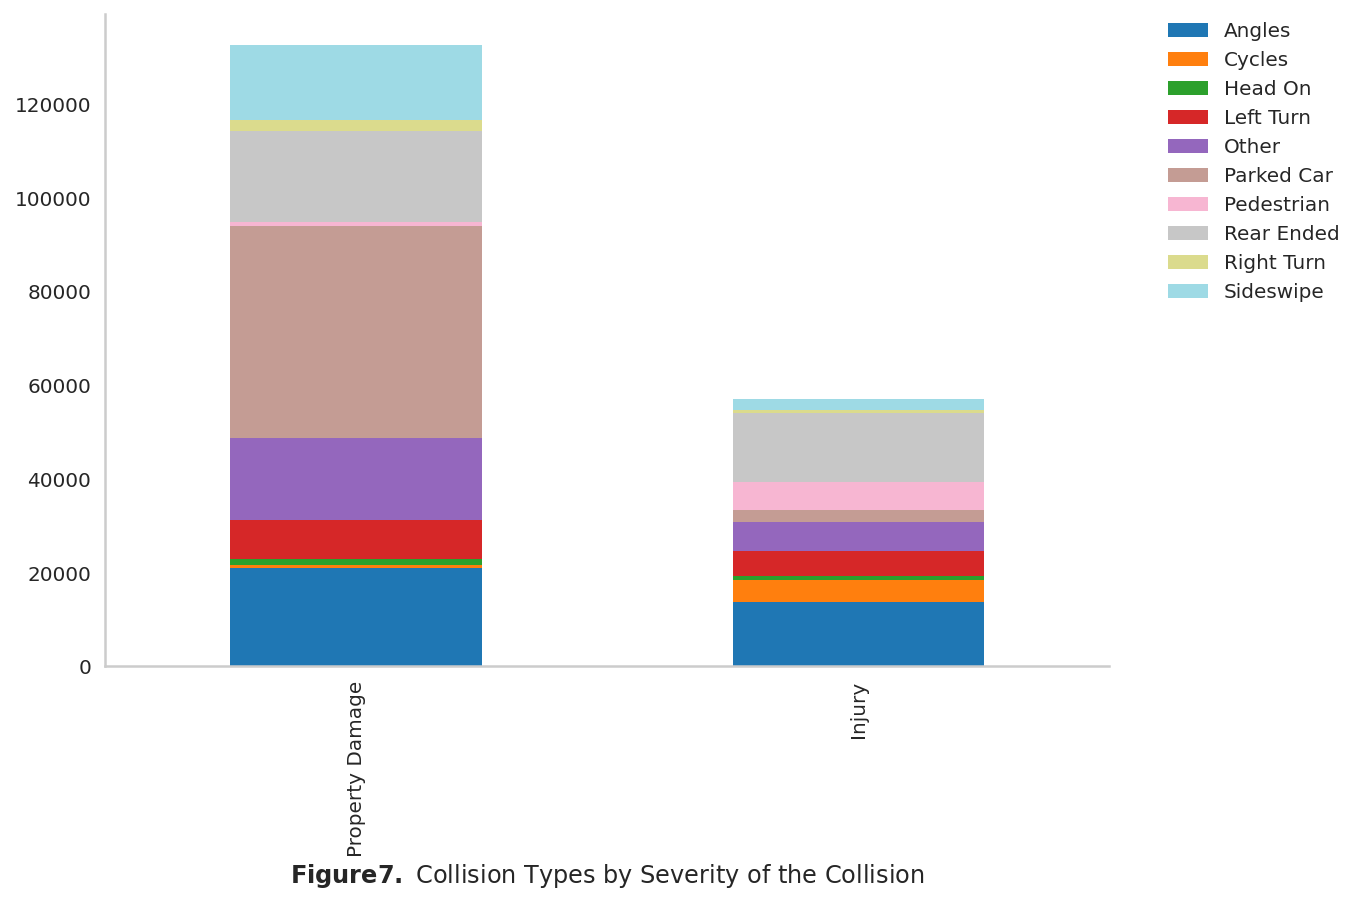

In [35]:
stacked = df \
    .groupby(['collision_type', 'severity_code']) \
    .size() \
    .reset_index() \
    .pivot(columns='collision_type', index='severity_code', values=0)
stacked.index = ['Property Damage', 'Injury']

ax = stacked.plot(
    kind='bar', 
    stacked=True, 
    figsize=(9, 6),
    colormap='tab20'
)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(False)

ax.set_title(set_title(7, 'Collision Types by Severity of the Collision'), y=-0.35)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

ax.figure.savefig('images/figure7.png', dpi=300, bbox_inches='tight')

As we can see, **parked car** collisions are likely to result in propert damage. It is also interesting to note that **angles** related collsions result in property damage and injuries. 

**Seasonality**

There can be a certain amount of cars on the road during certain seasons in a year that may be correlated to accidents and severity. 

In [36]:
condition = df['inc_date'].dt.year != 2020
dates = df[condition].groupby('inc_date').size()
decompose = seasonal_decompose(dates, freq=365)

FileNotFoundError: [Errno 2] No such file or directory: 'images/figure8.png'

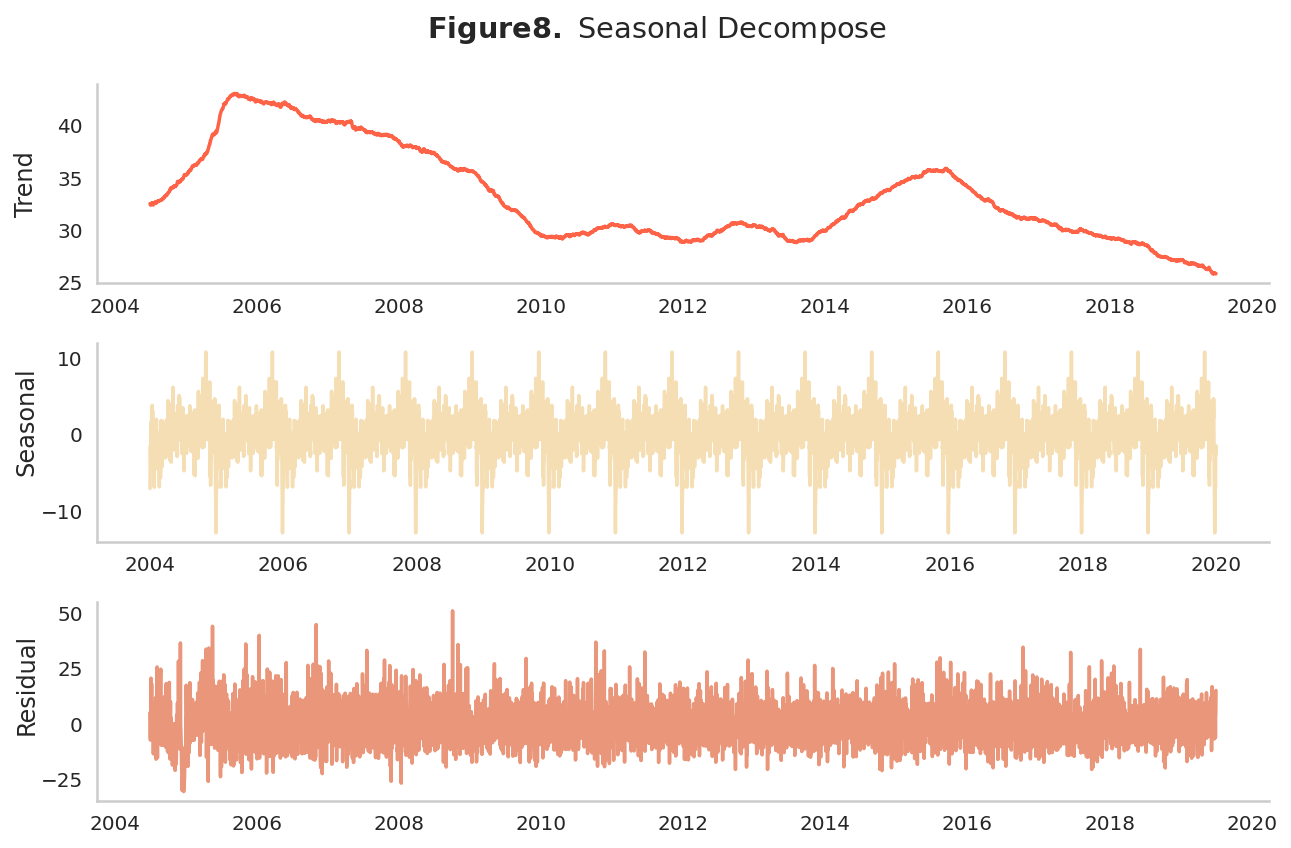

In [37]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1)

fig.set_figwidth(9)
fig.set_figheight(6)

ax1.plot(decompose.trend, color='tomato')
ax1.set_title('Trend', rotation=90, x=-0.06, y=0.3)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.grid(False)

ax2.plot(decompose.seasonal, color='wheat')
ax2.set_title('Seasonal', rotation=90, x=-0.06, y=0.3)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.grid(False)

ax3.plot(decompose.resid, color='darksalmon')
ax3.set_title('Residual', rotation=90, x=-0.06, y=0.3)
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.grid(False)

fig.suptitle(set_title(8, 'Seasonal Decompose'))
fig.tight_layout()

fig.savefig('images/figure8.png', dpi=300, bbox_inches='tight')

We can see seasonality in this diagram. We can see which month has had the most accidents. 

In [38]:

date_df = df[['inc_date', 'inc_datetime', 'severity_code']].copy()

date_df.loc[:, 'year'] = date_df['inc_date'].dt.year
date_df.loc[:, 'month'] = date_df['inc_date'].dt.month
date_df.loc[:, 'day'] = date_df['inc_date'].dt.day

In [39]:
month_based = date_df \
    .groupby(['year', 'month']) \
    .size() \
    .rename('num_of_observations') \
    .reset_index()


FileNotFoundError: [Errno 2] No such file or directory: 'images/figure9.png'

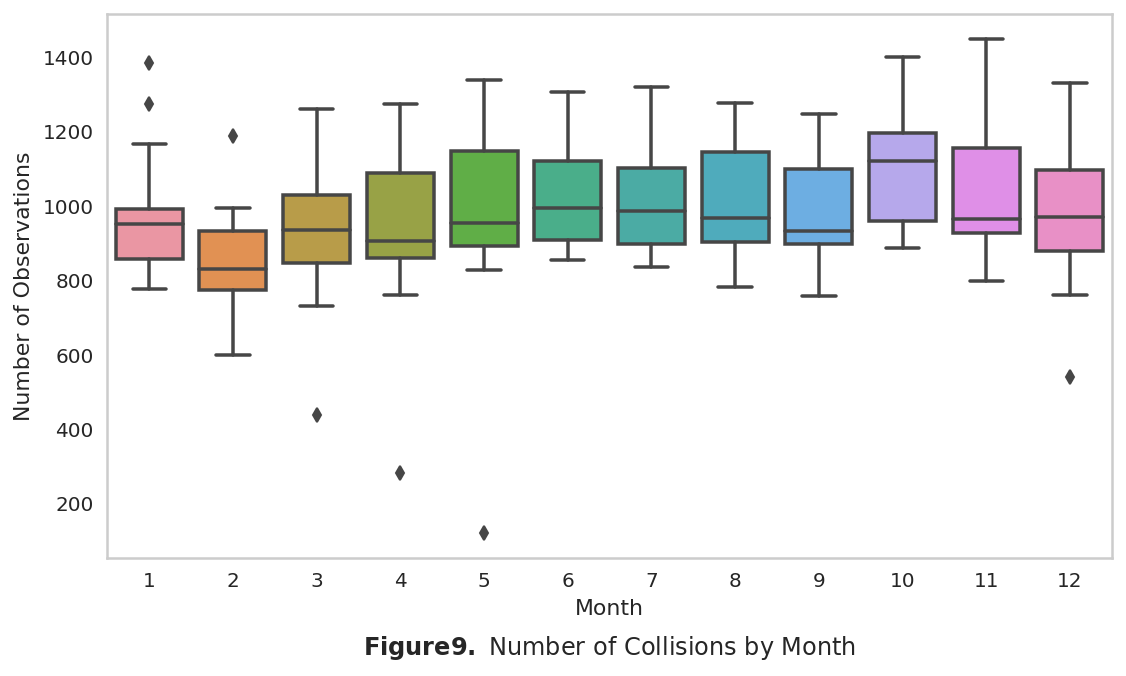

In [40]:
ax = sns.boxplot(x='month', y='num_of_observations', data=month_based)
ax.grid(False)
ax.figure.set_figwidth(9)
ax.figure.set_figheight(5)

ax.set_xlabel('Month')
ax.set_ylabel('Number of Observations')
ax.set_title(set_title(9, 'Number of Collisions by Month'), y=-0.2)

ax.figure.savefig('images/figure9.png', dpi=300, bbox_inches='tight')

As we can see, there are certain months that accidents occur more frequently. Additionaly, there are no outliers. 

In [41]:
date_df['week'] = date_df['inc_date'].dt.week
date_df['day_name'] = date_df['inc_date'].dt.day_name()

In [42]:
day_based = date_df \
    .groupby(['week', 'day_name']) \
    .size() \
    .rename('num_of_observations') \
    .reset_index()

In [43]:
days = [
    'Monday',
    'Tuesday',
    'Wednesday',
    'Thursday',
    'Friday',
    'Saturday', 
    'Sunday'
]

day_based['day_name'] = pd.Categorical(day_based['day_name'], categories=days, ordered=True)

FileNotFoundError: [Errno 2] No such file or directory: 'images/figure10.png'

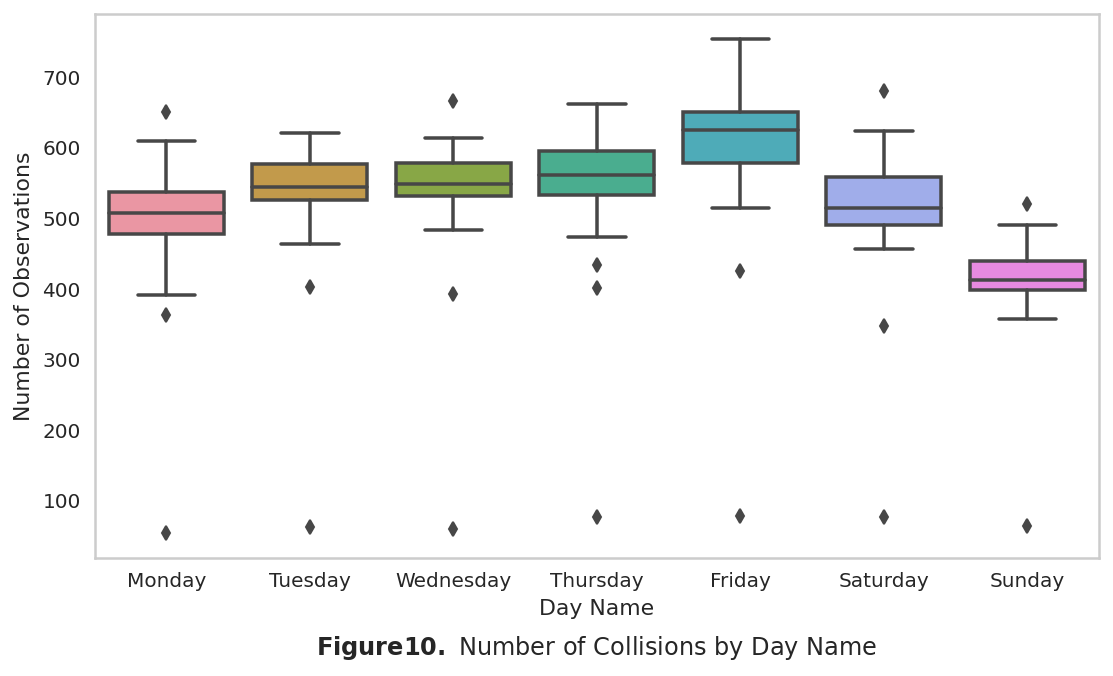

In [44]:
ax = sns.boxplot(x='day_name', y='num_of_observations', data=day_based)
ax.grid(False)
ax.figure.set_figwidth(9)
ax.figure.set_figheight(5)

ax.set_xlabel('Day Name')
ax.set_ylabel('Number of Observations')
ax.set_title(set_title(10, 'Number of Collisions by Day Name'), y=-0.2)

ax.figure.savefig('images/figure10.png', dpi=300, bbox_inches='tight')

As we can see, the highest number of accidents occur on a Friday and the lowest amount accur on a Sunday. 

In [45]:
date_df.loc[:, 'hour'] = date_df['inc_datetime'].dt.hour

In [46]:
cond1 = date_df.inc_datetime.dt.hour == 0
cond2 = date_df.inc_datetime.dt.minute == 0

hour_based = date_df[~(cond1 & cond2)] \
    .groupby(['day_name', 'hour']) \
    .size() \
    .rename('num_of_observations') \
    .reset_index()

FileNotFoundError: [Errno 2] No such file or directory: 'images/figure11.png'

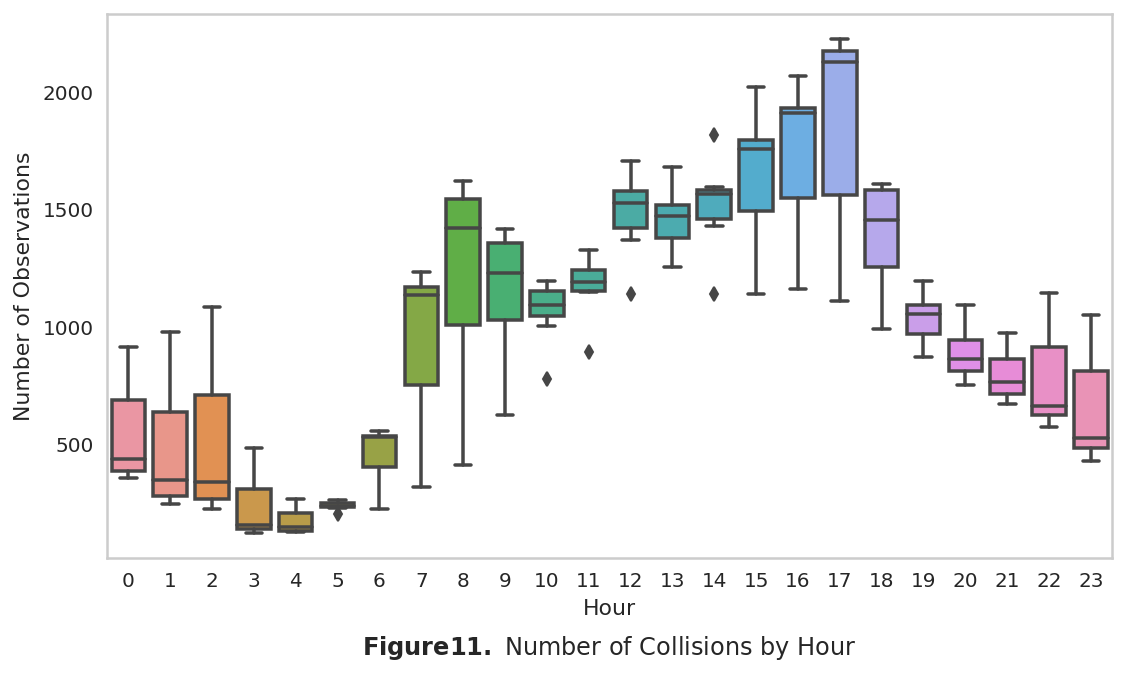

In [47]:
ax = sns.boxplot(x='hour', y='num_of_observations', data=hour_based)
ax.grid(False)
ax.figure.set_figwidth(9)
ax.figure.set_figheight(5)

ax.set_xlabel('Hour')
ax.set_ylabel('Number of Observations')
ax.set_title(set_title(11, 'Number of Collisions by Hour'), y=-0.2)

ax.figure.savefig('images/figure11.png', dpi=300, bbox_inches='tight')

As we can see, the highest amount of accidents occur during 5 pm. In other words, it seems that the most accidents occur during rush hour. The lowest amount of accidents occur at around 4 am. 

**Missing Values**

In [48]:
df.loc[:, 'month'] = df['inc_date'].dt.month
df.loc[:, 'day_name'] = df['inc_date'].dt.day_name()
df.loc[:, 'hour'] = df['inc_datetime'].dt.hour

df = df.drop(columns=['inc_datetime', 'inc_date'])

In [49]:
df.isnull().sum()

lat               5334
lon               5334
severity_code        0
addr_type         1926
collision_type    4904
under_infl           0
weather           5081
road_cond         5012
light_cond        5170
hit_parked_car       0
is_ped               0
is_bike              0
month                0
day_name             0
hour                 0
dtype: int64

In [50]:
df.isin(['Unknown']).sum(axis=0)

lat                   0
lon                   0
severity_code         0
addr_type             0
collision_type        0
under_infl            0
weather           15091
road_cond         15078
light_cond        13473
hit_parked_car        0
is_ped                0
is_bike               0
month                 0
day_name              0
hour                  0
dtype: int64

In [51]:
unknown_cols = [
    'weather', 
    'road_cond', 
    'light_cond'
]

for col in unknown_cols:
    df.loc[df[col] == 'Unknown', col] = np.nan

In [52]:
miss_columns = [
    'addr_type',
    'collision_type',
    'weather',
    'road_cond',
    'light_cond',
    'lat',
    'lon'
]

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


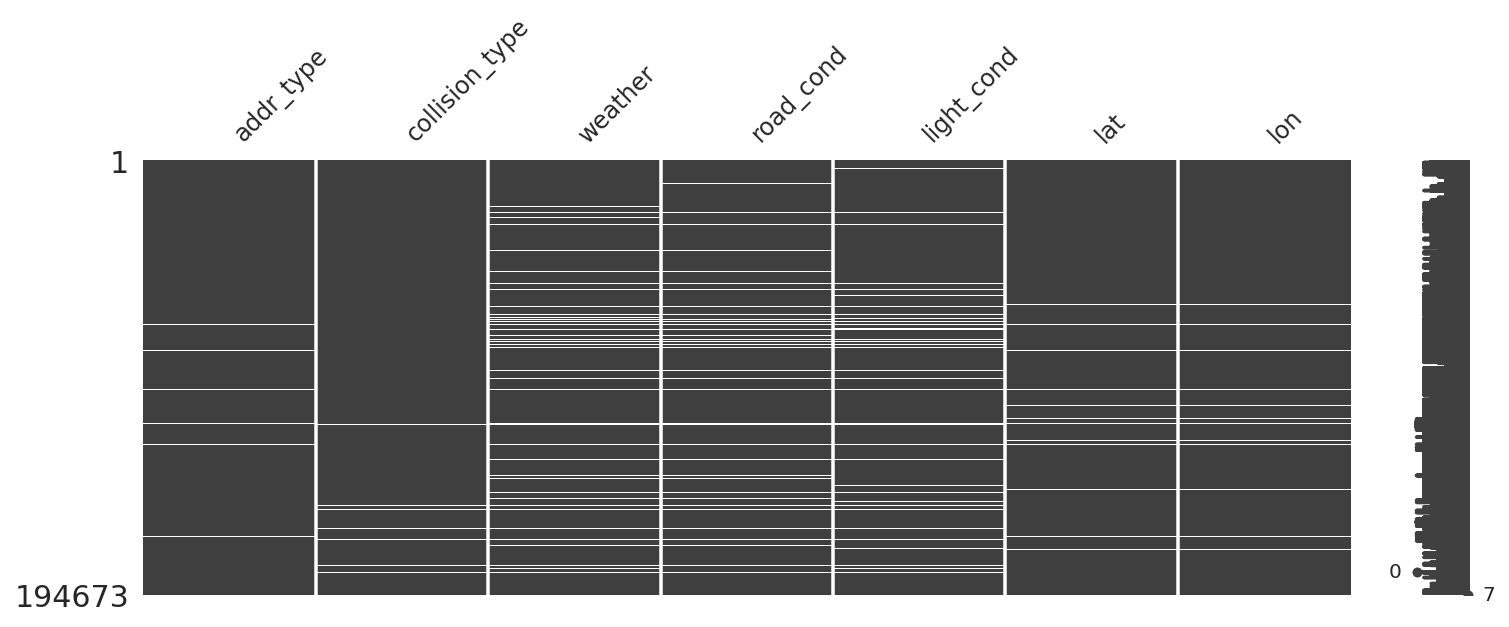

In [53]:
msno.matrix(df[miss_columns], figsize=(12, 4), fontsize=12);

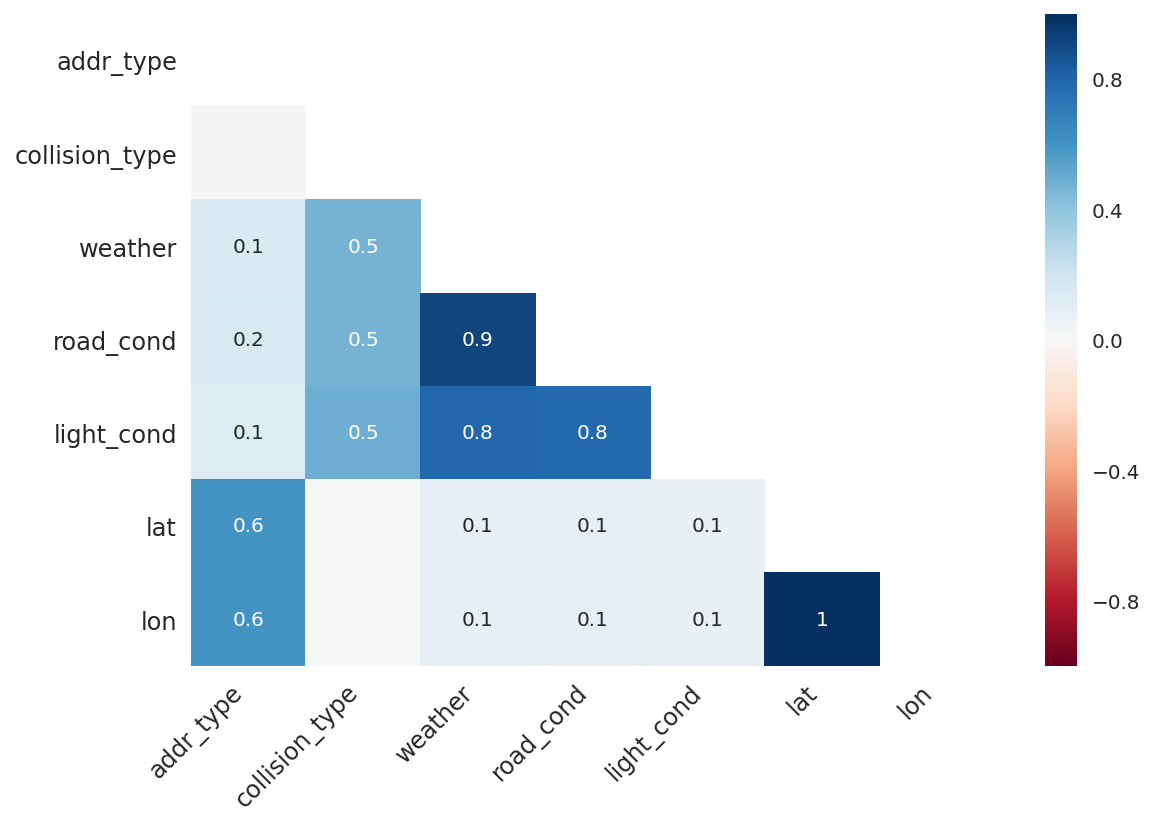

In [54]:
msno.heatmap(df[miss_columns], figsize=(9, 6), fontsize=12);

As you can see, there is a strong correlation between **weather**, **road_cond**, and **light_cond**. There is also a very strong correlation between these and **collision_type**. On the other hand, there are relations between **addr_type** and **lat**, **addr_type** and **lon**. If there is a correlation between these features when looking at null values, this is **Missing not at random (MNAR), also known as nonignorable nonresponse.** Let's look into why the data is null. 


In [55]:
for addr in df['addr_type'].unique():
    if isinstance(addr, float):
        continue
        
    temp = df[df['addr_type'] == addr]
    nc = temp['lat'].isnull().sum()
    tc = len(temp)
    print(f'There are {nc} null latitude values in {tc} observations when address type is {addr.lower()}')

There are 322 null latitude values in 65070 observations when address type is intersection
There are 2335 null latitude values in 126926 observations when address type is block
There are 751 null latitude values in 751 observations when address type is alley


When we do a little research, we can see that the coordinate information for the **alley** address type is null. As you know, we don't have any other data that includes the **alley** address type, so in this situation we can't handle the missing coordinates in smart ways. We'll just fill these values with a median value, because we don't want to lose **alley** address type.

In [56]:
df.loc[df['lat'].isnull(), 'lat'] = df['lat'].median()
df.loc[df['lon'].isnull(), 'lon'] = df['lon'].median()

In [57]:
condition = (
    (df.weather.isnull()) & 
    (df.road_cond.isnull()) & 
    (df.light_cond.isnull())
)

cols = ['collision_type', 'addr_type']
subset = df[condition].dropna(subset=cols).copy()

In [58]:
subset['severity_code'].value_counts()


1    9189
2     333
Name: severity_code, dtype: int64

When we look at the observations where the **weather**, **road_cond** and **light_cond** are missing, we see that the accidents result in material damage usually. At this point, we will select observations where collisions result in property damage and fill in missing values with mode most frequent value.

In [59]:
cond_columns = [
    'weather',
    'road_cond',
    'light_cond'
]
for col in cond_columns:
    mode = df[df['severity_code'] == 1][col].mode().iloc[0]
    df.loc[df[col].isnull(), col] = mode

Finally, we can fill the missing values in the addr_type and collision_type columns by frequency.



In [60]:
other_columns = [
    'addr_type',
    'collision_type'
]
for col in other_columns:
    counts = df[col].value_counts(normalize=True)
    
    condition = df[col].isna()
    df.loc[condition, col] = np.random.choice(
        counts.index, 
        p=counts.values, 
        size=condition.sum()
    )

**Location Clustering**

Let's create our own districts based on the number of collisions. Thus, we can also use longitude and latitude values to classify severity of collisions.



In [61]:

coordinate_based = df \
    .groupby(['lat', 'lon']) \
    .size() \
    .rename('num_of_observations') \
    .reset_index()

In [62]:

X = coordinate_based[['lat', 'lon']].copy()
X_scaled = StandardScaler().fit_transform(X)
weights = coordinate_based.num_of_observations.copy()

We can find the optimal number of clusters with the help of the elbow method. We'll use the **yellowbrick** library in python to this. But there is important point we should not miss before that, which is to scale the values. So we used **StandardScaler** in the previous cell.

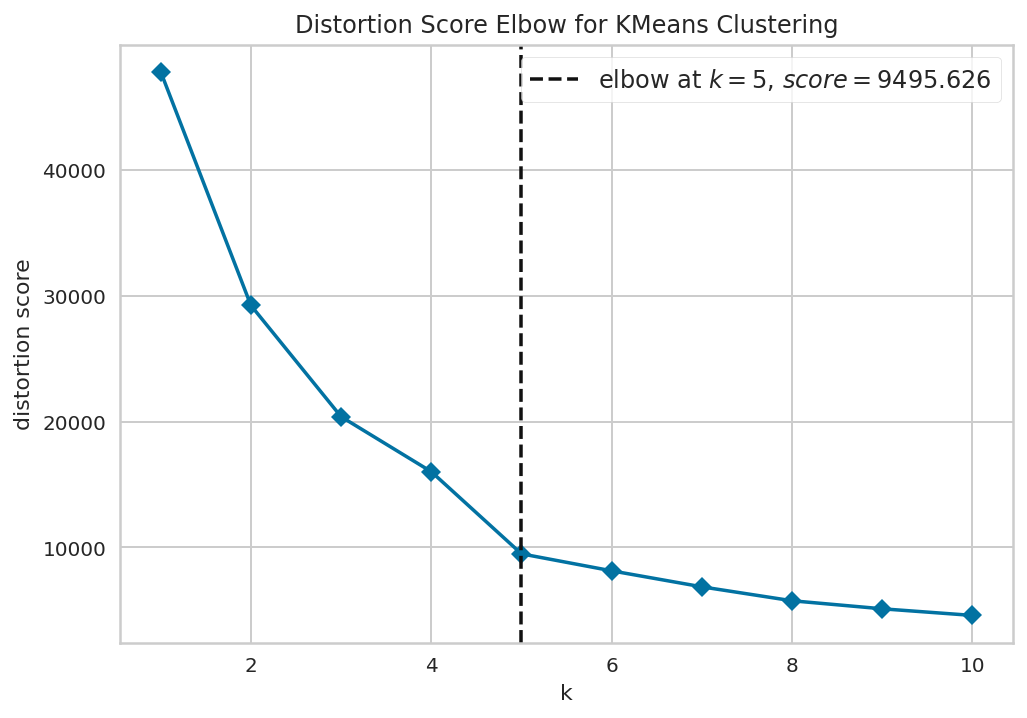

In [63]:
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(1, 11), timings=False)
visualizer.fit(X_scaled, sample_weight=weights)
visualizer.show();

As you can see in the chart, the optimal value is 5 to clustering.



In [64]:
kmeans = KMeans(n_clusters=5).fit(X_scaled, sample_weight=weights)

In [65]:
scaled_data = StandardScaler().fit_transform(df[['lat', 'lon']])
df.loc[:, 'district'] = kmeans.predict(scaled_data)

In [66]:
district_based = df \
    .groupby(['lat', 'lon', 'district']) \
    .size() \
    .rename('num_of_observations') \
    .reset_index()

FileNotFoundError: [Errno 2] No such file or directory: 'images/figure12.png'

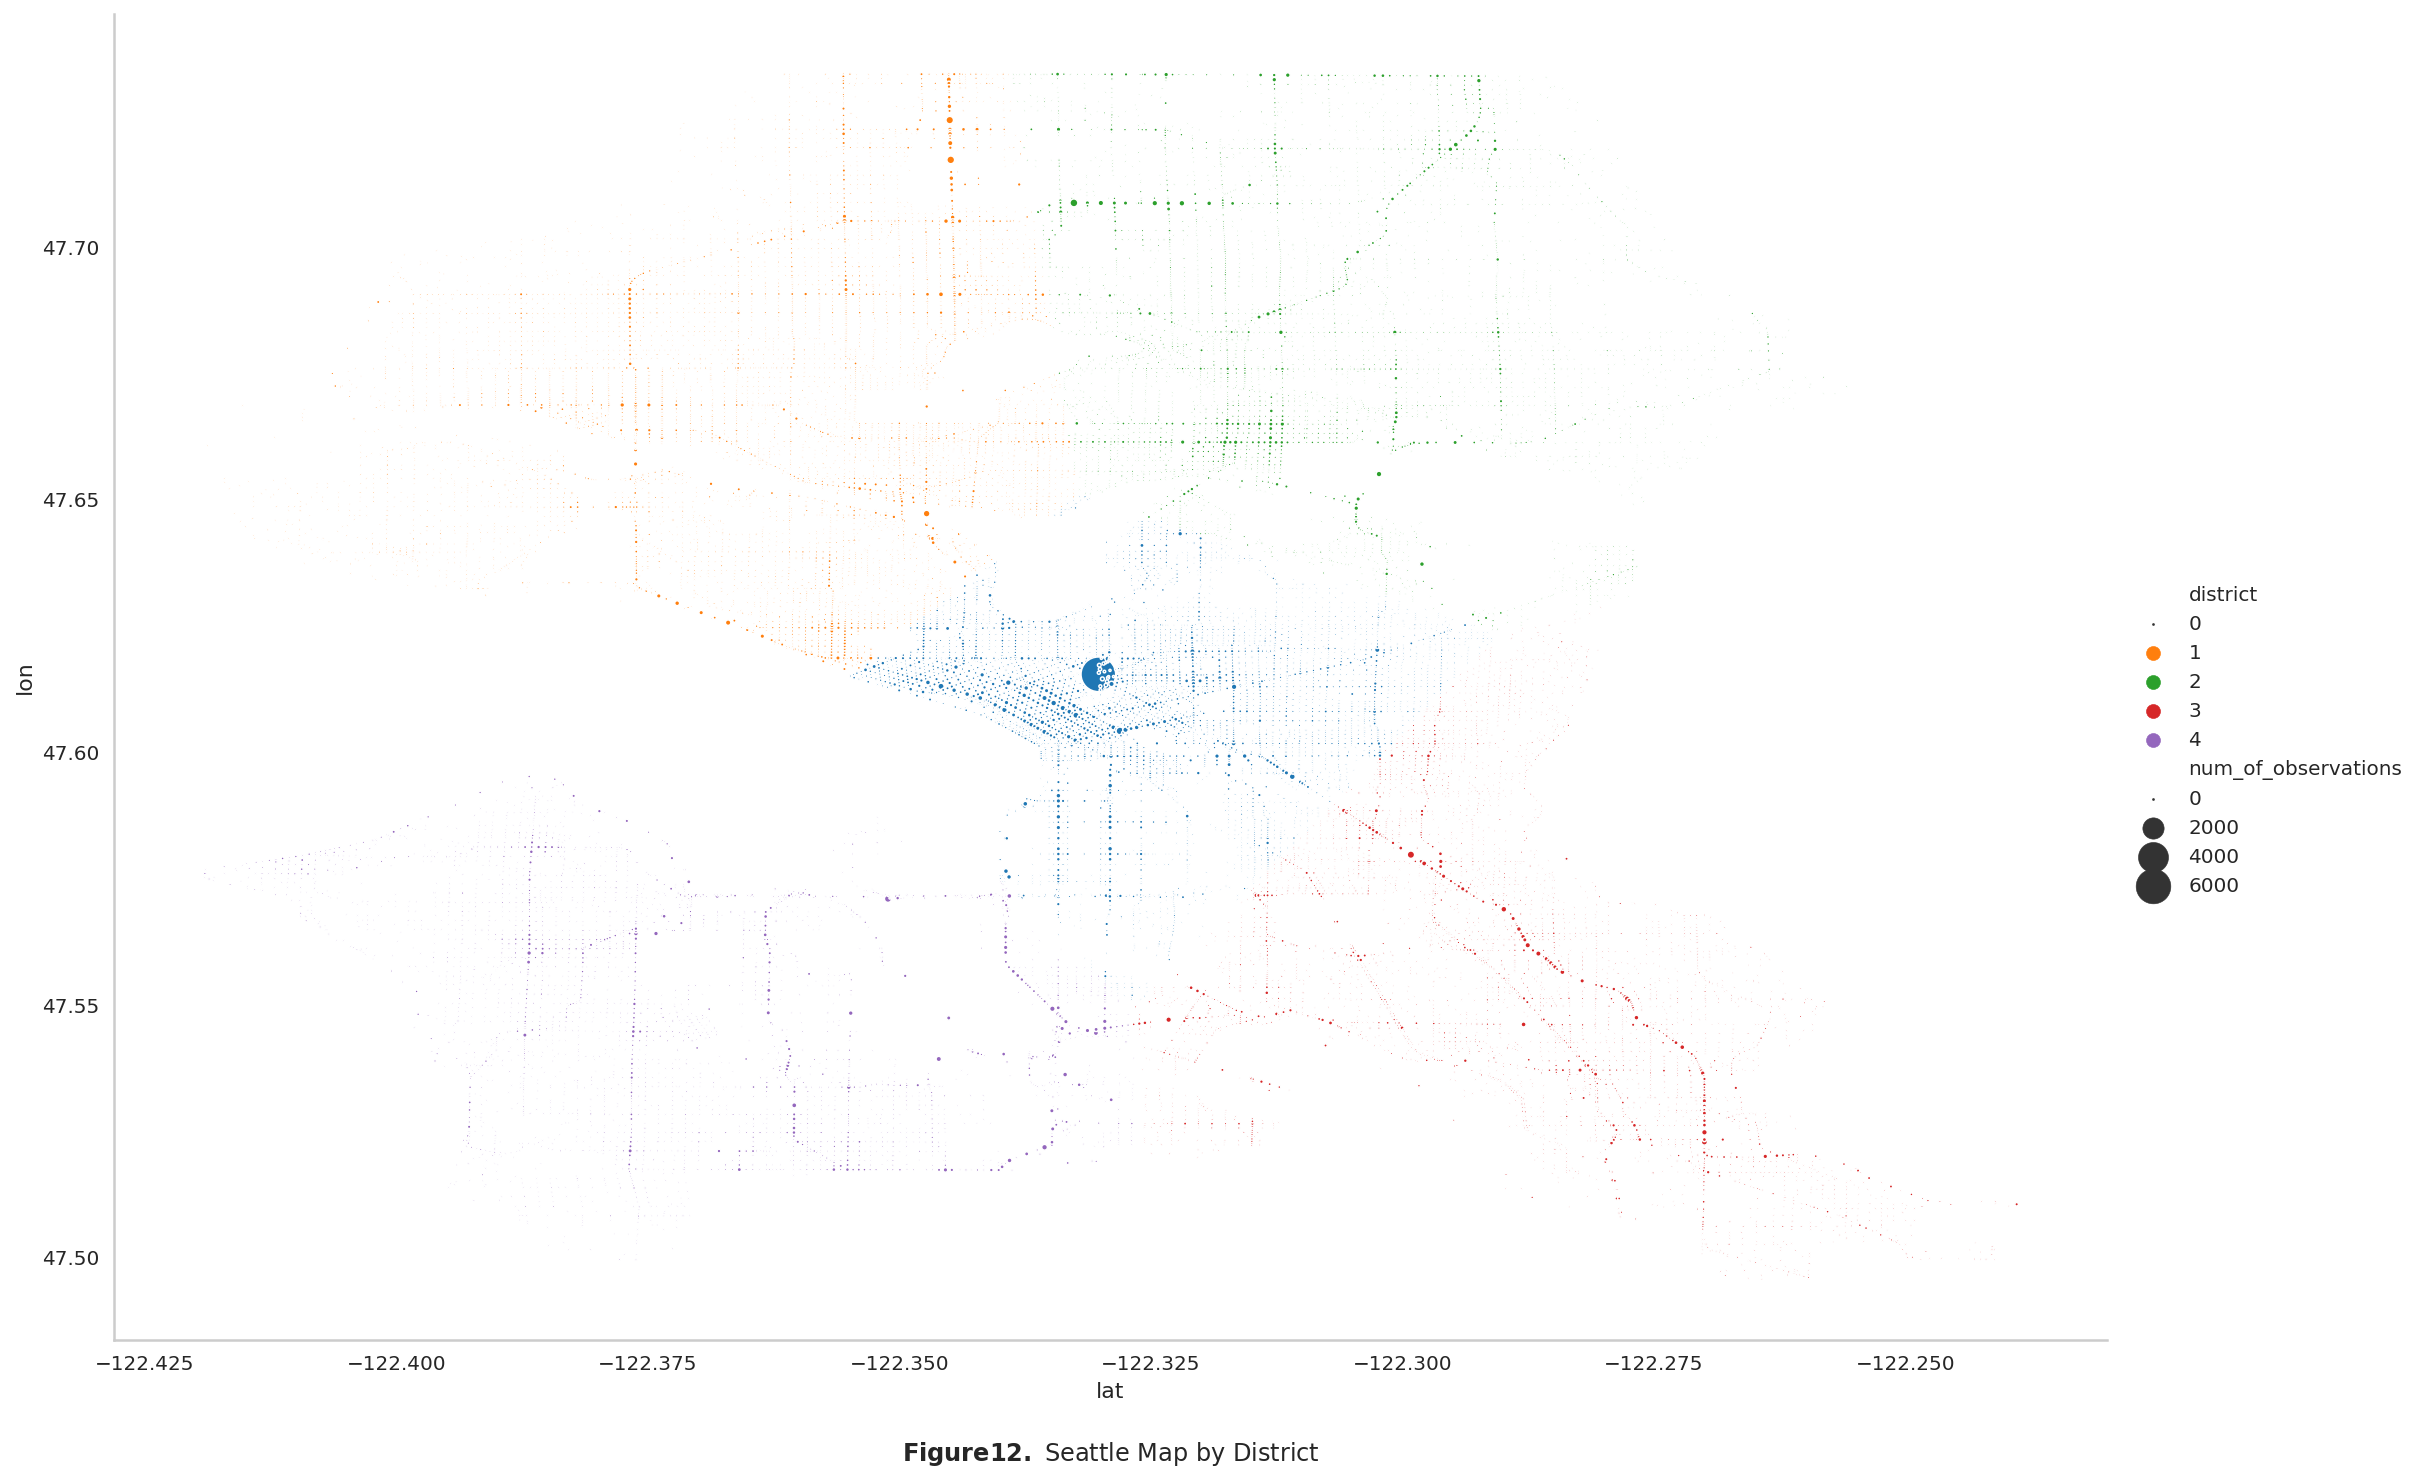

In [67]:
g = sns.relplot(
    x='lat', 
    y='lon', 
    hue='district', 
    size='num_of_observations',
    sizes=(1, 300), 
    height=10, 
    aspect=1.5,
    data=district_based,
    palette=sns.color_palette('tab10', n_colors=5)
)
g.ax.set_title(set_title(12, 'Seattle Map by District'), y=-0.1)
g.ax.grid(False)
g.savefig('images/figure12.png', dpi=300, bbox_inches='tight')

This is a minimap of Seattle and 5 districts.

**Building a Model**

Now we can build a model and start predicting accident severity. We'll start with classification algorithms.

In [68]:
clean_data = df.copy()

In [69]:
df = df.drop(columns=['lat', 'lon'])

In [70]:
dummy_columns = [
    'addr_type',
    'collision_type',
    'weather',
    'road_cond',
    'light_cond',
    'day_name'
]

for col in dummy_columns:
    df.loc[:, col] = df[col].str.lower()
    df.loc[:, col] = df[col].str.replace(' - ', ' ')
    df.loc[:, col] = df[col].str.replace('/', ' ')
    df.loc[:, col] = df[col].str.replace(' ', '_')

In [71]:
df.head()

,severity_code,addr_type,collision_type,under_infl,weather,road_cond,light_cond,hit_parked_car,is_ped,is_bike,month,day_name,hour,district
0,2,intersection,angles,0.0,overcast,wet,daylight,0,0,0,3,wednesday,14,2
1,1,block,sideswipe,0.0,raining,wet,dark_street_lights_on,0,0,0,12,wednesday,18,1
2,1,block,parked_car,0.0,overcast,dry,daylight,0,0,0,11,thursday,10,0
3,1,block,other,0.0,clear,dry,daylight,0,0,0,3,friday,9,0
4,2,intersection,angles,0.0,raining,wet,daylight,0,0,0,1,wednesday,8,3


In [72]:
df_ohe = pd.get_dummies(data=df, columns=dummy_columns)


In [73]:
X = df_ohe.drop('severity_code', axis=1)
y = df_ohe['severity_code']
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.33,
    random_state=0
)

**Logistic Regression**

In [74]:
lr = LogisticRegression().fit(X_train, y_train)
print(classification_report(y_test, lr.predict(X_test)))


              precision    recall  f1-score   support

           1       0.74      0.98      0.84     44933
           2       0.80      0.21      0.34     19310

    accuracy                           0.75     64243
   macro avg       0.77      0.59      0.59     64243
weighted avg       0.76      0.75      0.69     64243



**sc1**: severity code 1

**sc2**: severity code 2
 
When we look at the sc2 collisions, the recall is very low. The reason of this case is imbalanced dataset. As you know, the number of observations with sc1 in the data set is much higher than the number of observations with sc2. Let's try cost effective way to reduce effect of imbalanced dataset.

In [75]:
n_samples = len(df_ohe)
n_classes = 2
n_samples_with_1 = len(df[df['severity_code'] == 1])
n_samples_with_2 = len(df[df['severity_code'] == 2])

In [76]:
w1 = n_samples / (n_classes * n_samples_with_1)
w2 = n_samples / (n_classes * n_samples_with_2)

class_weight = {1: w1, 2: w2}

In [77]:
lr = LogisticRegression(class_weight=class_weight).fit(X_train, y_train)
print(classification_report(y_test, lr.predict(X_test)))

              precision    recall  f1-score   support

           1       0.87      0.59      0.71     44933
           2       0.46      0.80      0.58     19310

    accuracy                           0.66     64243
   macro avg       0.67      0.70      0.65     64243
weighted avg       0.75      0.66      0.67     64243



We'll use under sampling method and **SMOTE** to over sampling in the **imblearn** library. Then, we'll compare the results and select the best model.

In [78]:
X_train_rus, y_train_rus = RandomUnderSampler().fit_resample(X_train, y_train)

In [79]:
X1, y1 = SMOTE(sampling_strategy=0.75).fit_resample(X_train, y_train)
X_train_both, y_train_both = RandomUnderSampler().fit_resample(X1, y1)

In [80]:
lr_rus = LogisticRegression().fit(X_train_rus, y_train_rus)
print(classification_report(y_test, lr_rus.predict(X_test)))

              precision    recall  f1-score   support

           1       0.87      0.59      0.71     44933
           2       0.46      0.80      0.58     19310

    accuracy                           0.66     64243
   macro avg       0.67      0.70      0.64     64243
weighted avg       0.75      0.66      0.67     64243



In [81]:
lr_both = LogisticRegression().fit(X_train_both, y_train_both)
print(classification_report(y_test, lr_both.predict(X_test)))

              precision    recall  f1-score   support

           1       0.86      0.63      0.72     44933
           2       0.47      0.76      0.58     19310

    accuracy                           0.67     64243
   macro avg       0.66      0.69      0.65     64243
weighted avg       0.74      0.67      0.68     64243



In [82]:
log_loss(y_test, lr.predict_proba(X_test))

0.5592645681880654

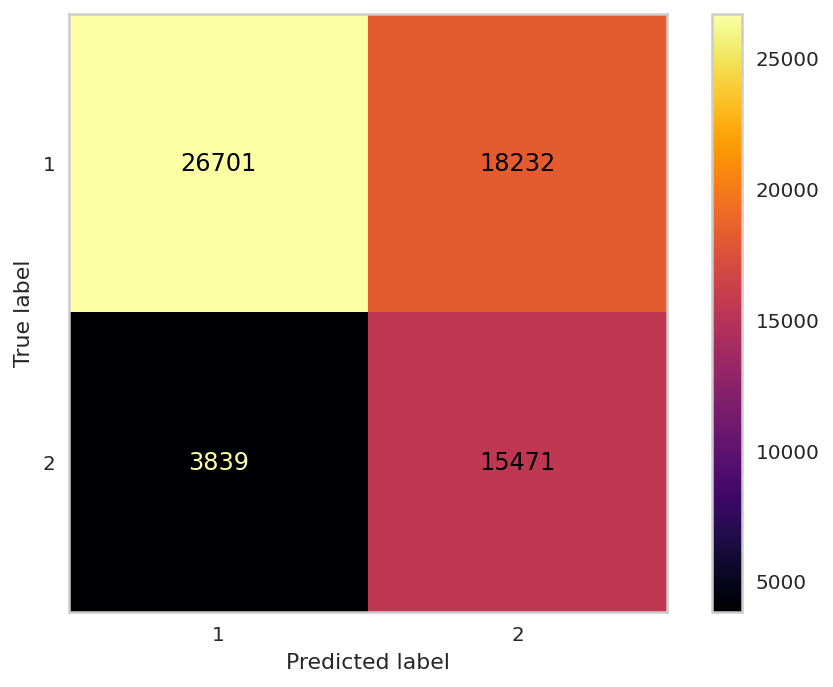

In [83]:
g = plot_confusion_matrix(lr, X_test, y_test, cmap='inferno')
g.ax_.grid(False);

FileNotFoundError: [Errno 2] No such file or directory: 'images/figure13.png'

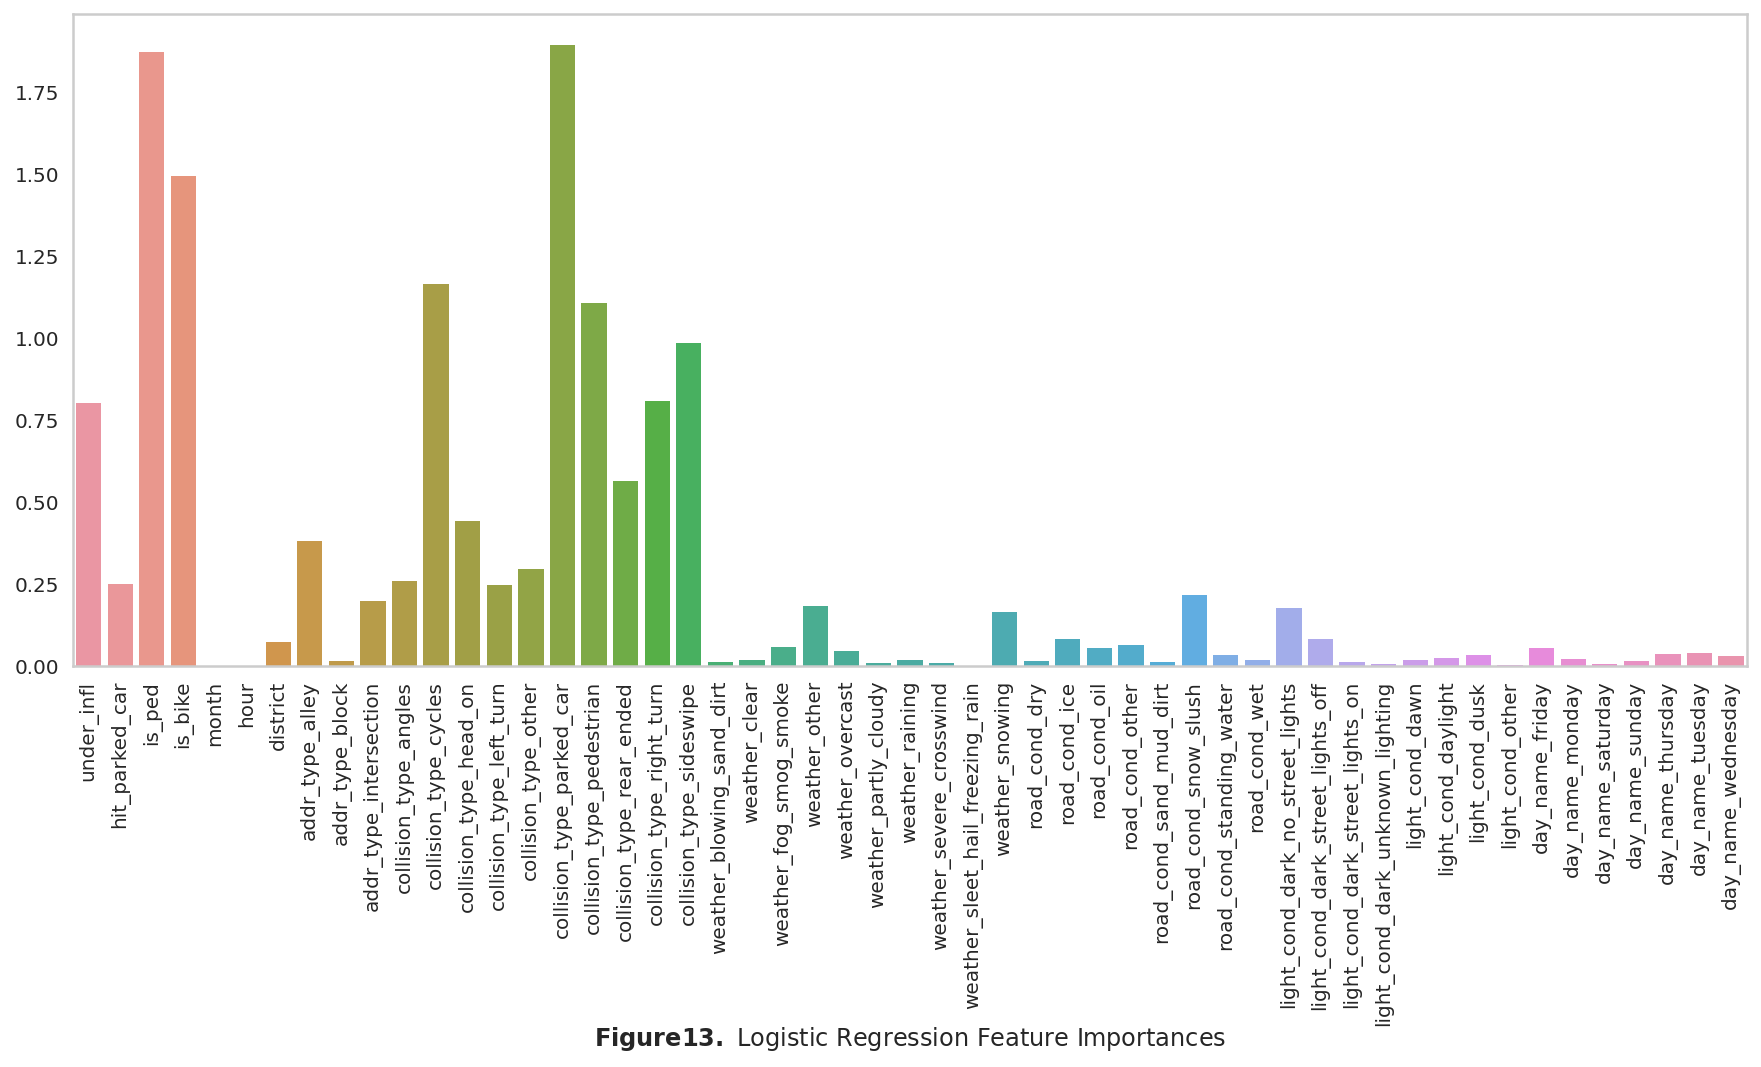

In [84]:
importances = [abs(i) for i in lr.coef_[0]]
ax = sns.barplot(X_train.columns, importances)

ax.figure.set_figwidth(15)
ax.figure.set_figheight(6)

ax.grid(False)
ax.set_title(set_title(13, 'Logistic Regression Feature Importances'), y=-0.6)

ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.figure.savefig('images/figure13.png', dpi=300, bbox_inches='tight')

**Random Forests**

In [85]:
rf = RandomForestClassifier().fit(X_train, y_train)
print(classification_report(y_test, rf.predict(X_test)))

              precision    recall  f1-score   support

           1       0.77      0.83      0.80     44933
           2       0.52      0.42      0.46     19310

    accuracy                           0.71     64243
   macro avg       0.64      0.63      0.63     64243
weighted avg       0.69      0.71      0.70     64243



In [86]:
rf = RandomForestClassifier(class_weight=class_weight).fit(X_train, y_train)
print(classification_report(y_test, rf.predict(X_test)))

              precision    recall  f1-score   support

           1       0.78      0.80      0.79     44933
           2       0.50      0.46      0.48     19310

    accuracy                           0.70     64243
   macro avg       0.64      0.63      0.63     64243
weighted avg       0.69      0.70      0.70     64243



In [87]:
rf_rus = RandomForestClassifier().fit(X_train_rus, y_train_rus)
print(classification_report(y_test, rf_rus.predict(X_test)))

              precision    recall  f1-score   support

           1       0.82      0.65      0.72     44933
           2       0.45      0.66      0.53     19310

    accuracy                           0.65     64243
   macro avg       0.63      0.65      0.63     64243
weighted avg       0.70      0.65      0.66     64243



In [88]:
rf_both = RandomForestClassifier().fit(X_train_both, y_train_both)
print(classification_report(y_test, rf_both.predict(X_test)))

              precision    recall  f1-score   support

           1       0.79      0.74      0.76     44933
           2       0.47      0.55      0.51     19310

    accuracy                           0.68     64243
   macro avg       0.63      0.64      0.64     64243
weighted avg       0.70      0.68      0.69     64243



**Model Tuning**

In [89]:
rf_params = {
    'max_depth': [15, 20],
    'max_features': [3, 5],
    'n_estimators': [1000, 1500],
    'min_samples_split': [20, 25]
}

In [90]:
randomized_cv = RandomizedSearchCV(
    RandomForestClassifier(),
    param_distributions=rf_params,
    cv=3,
    scoring='f1',
    verbose=5,
    n_jobs=-1,
    random_state=0
)

In [ ]:
rf_best = randomized_cv.fit(X_train_rus, y_train_rus)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] n_estimators=1500, min_samples_split=20, max_features=3, max_depth=15 


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=1500, min_samples_split=20, max_features=3, max_depth=15, score=0.680, total= 1.3min
[CV] n_estimators=1500, min_samples_split=20, max_features=3, max_depth=15 


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.3min remaining:    0.0s


[CV]  n_estimators=1500, min_samples_split=20, max_features=3, max_depth=15, score=0.680, total= 1.3min
[CV] n_estimators=1500, min_samples_split=20, max_features=3, max_depth=15 


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:  2.6min remaining:    0.0s


[CV]  n_estimators=1500, min_samples_split=20, max_features=3, max_depth=15, score=0.677, total= 1.3min
[CV] n_estimators=1000, min_samples_split=25, max_features=5, max_depth=15 


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  3.8min remaining:    0.0s


[CV]  n_estimators=1000, min_samples_split=25, max_features=5, max_depth=15, score=0.679, total= 1.1min
[CV] n_estimators=1000, min_samples_split=25, max_features=5, max_depth=15 


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  4.9min remaining:    0.0s


[CV]  n_estimators=1000, min_samples_split=25, max_features=5, max_depth=15, score=0.681, total= 1.0min
[CV] n_estimators=1000, min_samples_split=25, max_features=5, max_depth=15 
[CV]  n_estimators=1000, min_samples_split=25, max_features=5, max_depth=15, score=0.678, total= 1.0min
[CV] n_estimators=1000, min_samples_split=20, max_features=3, max_depth=20 
[CV]  n_estimators=1000, min_samples_split=20, max_features=3, max_depth=20, score=0.676, total= 1.0min
[CV] n_estimators=1000, min_samples_split=20, max_features=3, max_depth=20 
[CV]  n_estimators=1000, min_samples_split=20, max_features=3, max_depth=20, score=0.677, total= 1.1min
[CV] n_estimators=1000, min_samples_split=20, max_features=3, max_depth=20 
[CV]  n_estimators=1000, min_samples_split=20, max_features=3, max_depth=20, score=0.677, total= 1.1min
[CV] n_estimators=1500, min_samples_split=20, max_features=3, max_depth=20 
[CV]  n_estimators=1500, min_samples_split=20, max_features=3, max_depth=20, score=0.677, total= 1.6

[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 37.7min finished


In [100]:
rf_best.best_params_


{'n_estimators': 1500,
 'min_samples_split': 25,
 'max_features': 5,
 'max_depth': 15}

In [101]:
print(classification_report(y_test, rf_best.predict(X_test)))


              precision    recall  f1-score   support

           1       0.87      0.63      0.73     44933
           2       0.47      0.77      0.59     19310

    accuracy                           0.67     64243
   macro avg       0.67      0.70      0.66     64243
weighted avg       0.75      0.67      0.68     64243



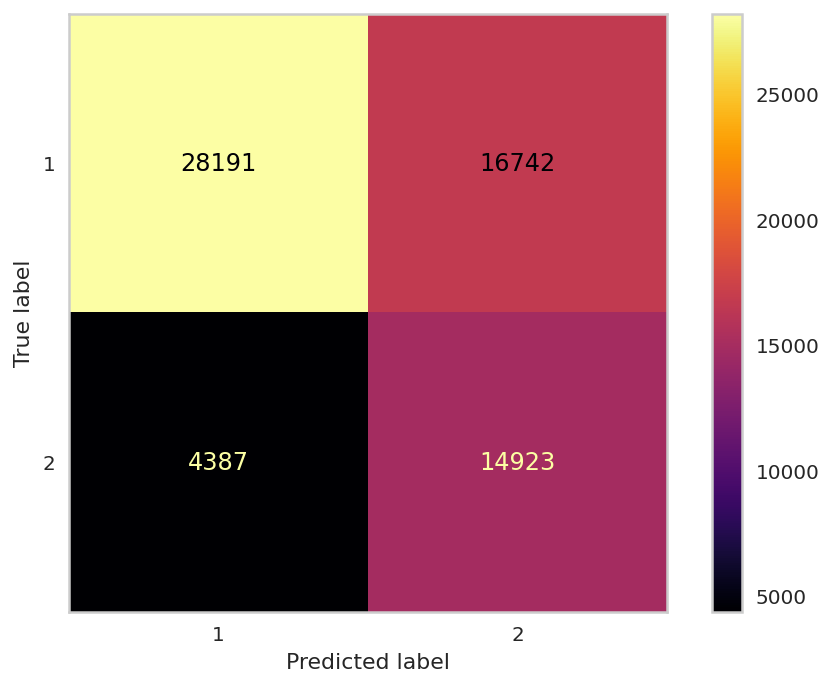

In [102]:
g = plot_confusion_matrix(rf_best, X_test, y_test, cmap='inferno')
g.ax_.grid(False);

FileNotFoundError: [Errno 2] No such file or directory: 'images/figure14.png'

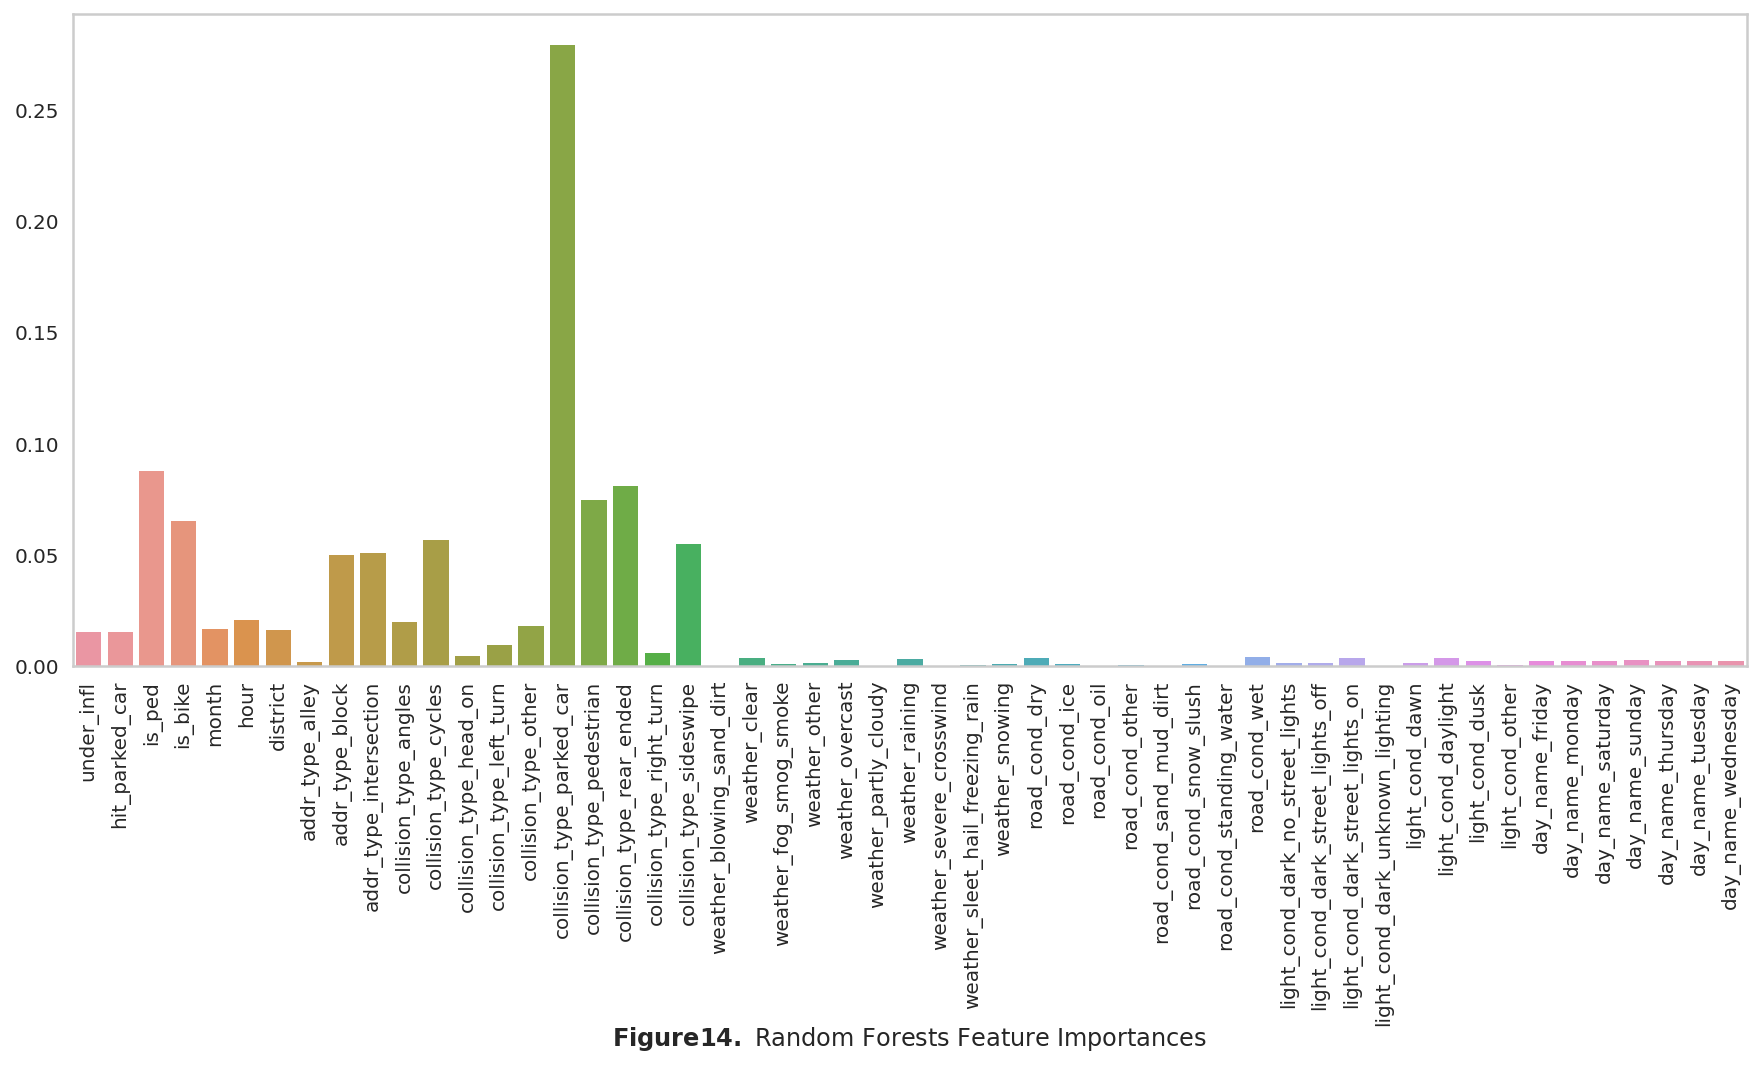

In [103]:
importances = rf_best.best_estimator_.feature_importances_
ax = sns.barplot(X_train.columns, importances)

ax.figure.set_figwidth(15)
ax.figure.set_figheight(6)

ax.set_title(set_title(14, 'Random Forests Feature Importances'), y=-0.6)
ax.grid(False)

ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.figure.savefig('images/figure14.png', dpi=300, bbox_inches='tight')

**Gradient Boosting**

In [104]:
gbm = GradientBoostingClassifier().fit(X_train, y_train)
print(classification_report(y_test, gbm.predict(X_test)))


              precision    recall  f1-score   support

           1       0.74      0.99      0.85     44933
           2       0.85      0.20      0.33     19310

    accuracy                           0.75     64243
   macro avg       0.80      0.59      0.59     64243
weighted avg       0.78      0.75      0.69     64243



In [105]:
gbm_rus = GradientBoostingClassifier().fit(X_train_rus, y_train_rus)
print(classification_report(y_test, gbm_rus.predict(X_test)))

              precision    recall  f1-score   support

           1       0.87      0.61      0.72     44933
           2       0.47      0.79      0.59     19310

    accuracy                           0.66     64243
   macro avg       0.67      0.70      0.65     64243
weighted avg       0.75      0.66      0.68     64243



In [106]:
gbm_both = GradientBoostingClassifier().fit(X_train_both, y_train_both)
print(classification_report(y_test, gbm_both.predict(X_test)))

              precision    recall  f1-score   support

           1       0.87      0.62      0.72     44933
           2       0.47      0.78      0.58     19310

    accuracy                           0.67     64243
   macro avg       0.67      0.70      0.65     64243
weighted avg       0.75      0.67      0.68     64243



**Model Tuning**

In [107]:
gbm_params = {
    'learning_rate' : [0.001, 0.01],
    'n_estimators': [100, 500],
    'max_depth': [3, 5],
    'min_samples_split': [2, 5],
}

In [108]:
randomized_cv = RandomizedSearchCV(
    GradientBoostingClassifier(),
    param_distributions=gbm_params,
    cv=3,
    scoring='f1',
    verbose=5,
    n_jobs=-1,
    random_state=0
)

In [109]:
gbm_best = randomized_cv.fit(X_train_rus, y_train_rus)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] n_estimators=500, min_samples_split=2, max_depth=3, learning_rate=0.001 


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=500, min_samples_split=2, max_depth=3, learning_rate=0.001, score=0.589, total= 1.1min
[CV] n_estimators=500, min_samples_split=2, max_depth=3, learning_rate=0.001 


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.1min remaining:    0.0s


[CV]  n_estimators=500, min_samples_split=2, max_depth=3, learning_rate=0.001, score=0.596, total= 1.1min
[CV] n_estimators=500, min_samples_split=2, max_depth=3, learning_rate=0.001 


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:  2.1min remaining:    0.0s


[CV]  n_estimators=500, min_samples_split=2, max_depth=3, learning_rate=0.001, score=0.588, total= 1.0min
[CV] n_estimators=100, min_samples_split=5, max_depth=5, learning_rate=0.001 


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  3.2min remaining:    0.0s


[CV]  n_estimators=100, min_samples_split=5, max_depth=5, learning_rate=0.001, score=0.660, total=  19.9s
[CV] n_estimators=100, min_samples_split=5, max_depth=5, learning_rate=0.001 


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  3.5min remaining:    0.0s


[CV]  n_estimators=100, min_samples_split=5, max_depth=5, learning_rate=0.001, score=0.662, total=  21.3s
[CV] n_estimators=100, min_samples_split=5, max_depth=5, learning_rate=0.001 
[CV]  n_estimators=100, min_samples_split=5, max_depth=5, learning_rate=0.001, score=0.656, total=  20.8s
[CV] n_estimators=100, min_samples_split=2, max_depth=3, learning_rate=0.01 
[CV]  n_estimators=100, min_samples_split=2, max_depth=3, learning_rate=0.01, score=0.590, total=  12.5s
[CV] n_estimators=100, min_samples_split=2, max_depth=3, learning_rate=0.01 
[CV]  n_estimators=100, min_samples_split=2, max_depth=3, learning_rate=0.01, score=0.596, total=  13.0s
[CV] n_estimators=100, min_samples_split=2, max_depth=3, learning_rate=0.01 
[CV]  n_estimators=100, min_samples_split=2, max_depth=3, learning_rate=0.01, score=0.588, total=  12.4s
[CV] n_estimators=500, min_samples_split=2, max_depth=3, learning_rate=0.01 
[CV]  n_estimators=500, min_samples_split=2, max_depth=3, learning_rate=0.01, score=0.6

[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 21.7min finished


In [ ]:
gbm_best.best_params_


In [110]:
print(classification_report(y_test, gbm_best.predict(X_test)))


              precision    recall  f1-score   support

           1       0.87      0.60      0.71     44933
           2       0.46      0.80      0.58     19310

    accuracy                           0.66     64243
   macro avg       0.67      0.70      0.65     64243
weighted avg       0.75      0.66      0.67     64243



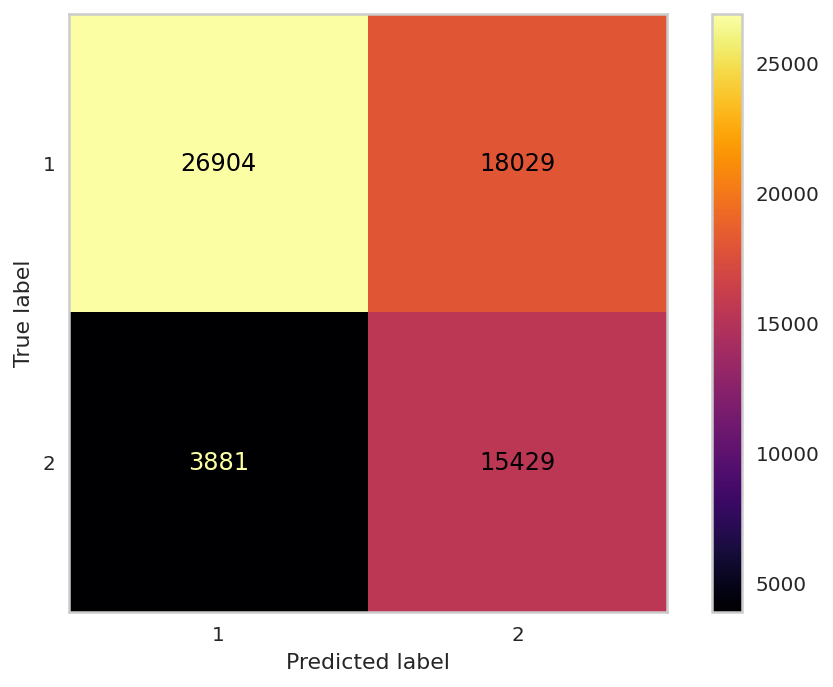

In [111]:
g = plot_confusion_matrix(gbm_best, X_test, y_test, cmap='inferno')
g.ax_.grid(False);

FileNotFoundError: [Errno 2] No such file or directory: 'images/figure15.png'

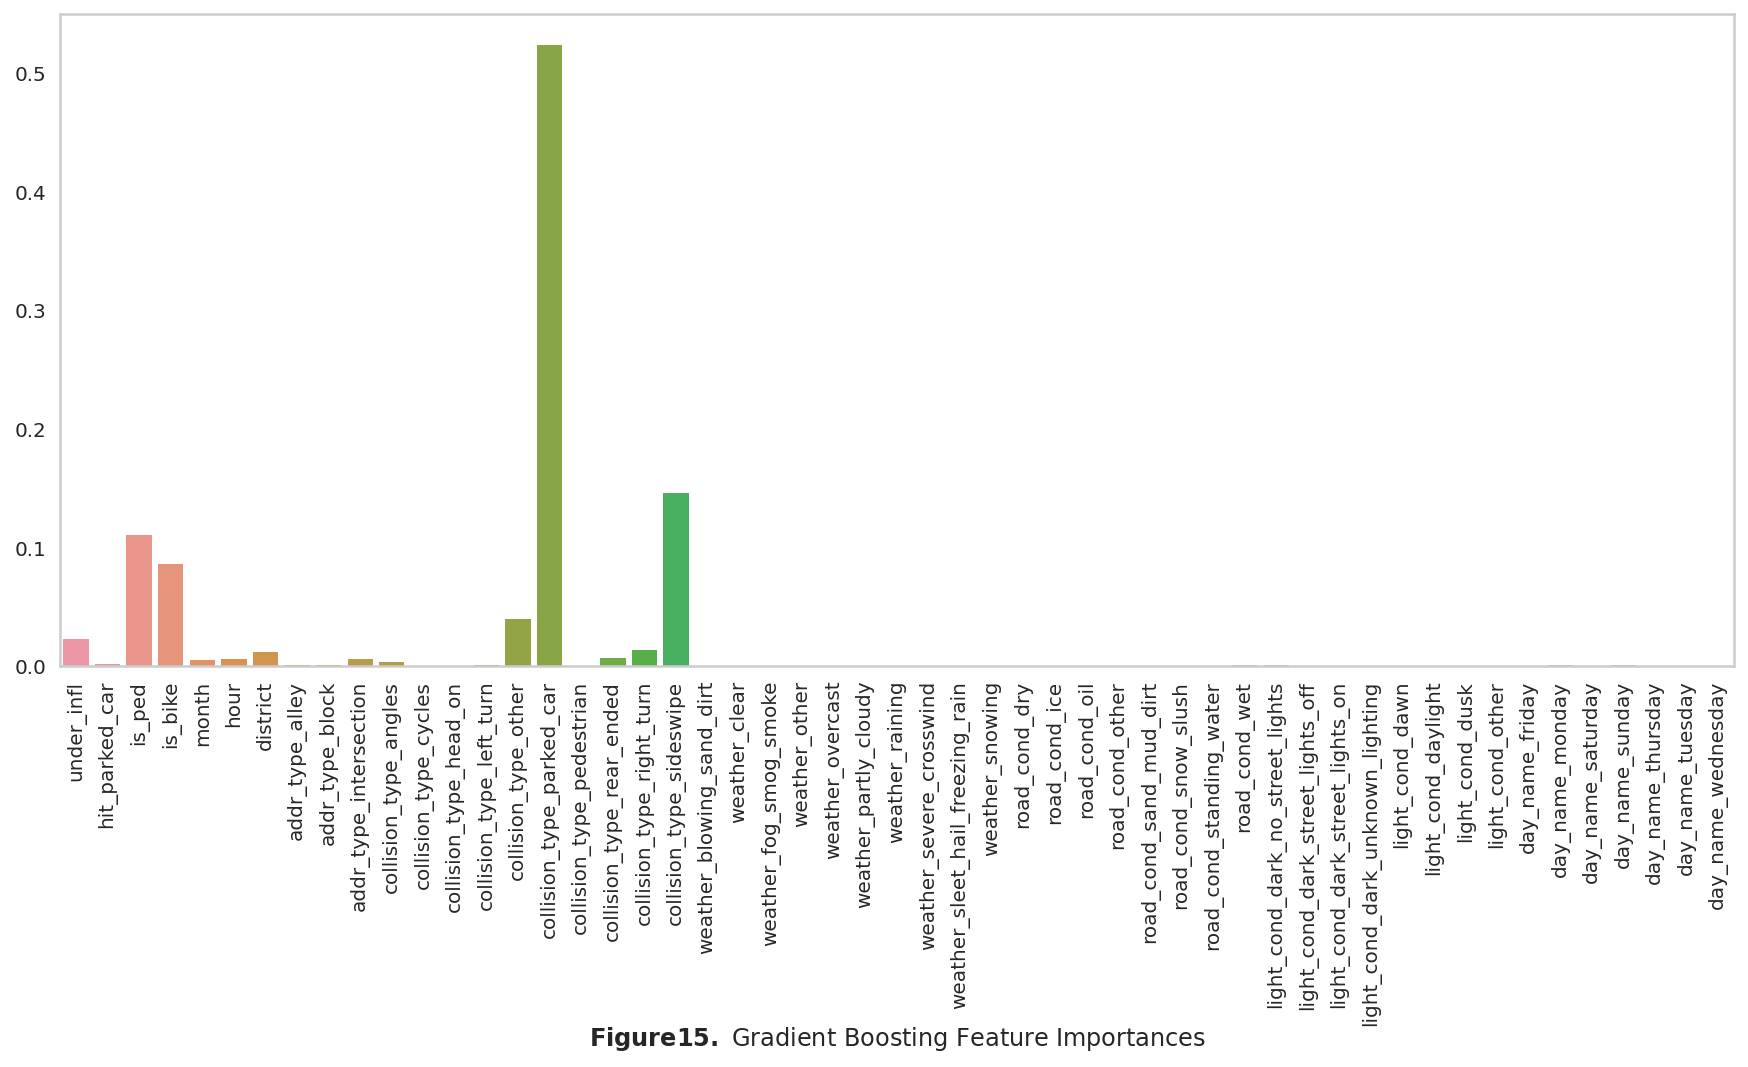

In [112]:
importances = gbm_best.best_estimator_.feature_importances_
ax = sns.barplot(X_train.columns, importances)

ax.figure.set_figwidth(15)
ax.figure.set_figheight(6)

ax.set_title(set_title(15, 'Gradient Boosting Feature Importances'), y=-0.6)
ax.grid(False)

ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.figure.savefig('images/figure15.png', dpi=300, bbox_inches='tight');

# Results and Discussion

When the training step is started without any balancing process between classes in the data set, the recall value for injuries caused by accidents seems quite low. At this point, it would not be wrong to say that the models predict that most accidents with injuries will result in property damage. The fact that the accidents resulting in injury cannot be predicted well, it means that the features that will differentiate the severity of the accident cannot be determined. Therefore, the suggestions to be made to prevent serious accidents cannot touch the right points.

In order to better predict the accidents that resulted in injury, the data set has been balanced and tested with classification algorithms. It is a well known fact that ensemble trees work in harmony with undersampling methods. After the necessary processes for balancing have been completed and the model has been builded, the recall value has increased for injury-related accidents, but there is a trade-off at this point: For accidents resulting in injury, while the recall value increases, the precision value decreases.

If a better solution cannot be found in such projects, the point to be waived should be chosen well. The basis of this decision is determining the goal, thus understanding the business. If causes of serious accidents are sought, better ways to predict serious accidents must be found and their causes investigated.

# Conclusion

The goal of this project is to predict the severity of car accidents and to reveal the factors affecting the severity. When examining the feature importance after the training step, it seems possible to say that there are several remarkable features. Whether the type of accident hit the parked car or not seems to affect the result greatly. On the other hand, it also seems quite effective that a pedestrian or cyclist was involved in the accident.

Going back to the exploratory data analysis step, it was mentioned that accidents involving parked cars often result in property damage. In addition, there is an insight in this section that many accidents involving a pedestrian or a cyclist result in injury.

Various points that can make suggestions based on all insights can be listed as follows,

Drivers should be more careful where pedestrians and/or cyclists are concentrated. (is_ped and is_bike)

Drivers should be more careful at intersections. (addr_type_intersection)

For areas where parked cars are particularly concentrated, suggestions can be made to municipalities and/or relevant authorities to build parking lots or to increase security measures. (collision_type_parked_car)

Extra measures can be taken to prevent driving under drugs and alcohol. (under_infl)

Drivers should be more careful about sideswipe. (collision_type_sideswipe)

Apart from the features that distinguish the two classes from each other, suggestions for situations where accidents occur frequently can be listed as follows:

Drivers should be more careful on Fridays.

At close hours to 5pm drivers should be more careful.

Special precautions can be taken by the relevant authorities, especially since there are angles type collisions at intersections.